# Combustion Chemistry in Isobaric Reactor: Visualizing Training and Test Data

In [1]:
### Importing Libraries

import sys
print(sys.version)
import os
import time


### Defining WORKSPACE_PATH

# WORKSPACE_PATH = os.environ['WORKSPACE_PATH']
WORKSPACE_PATH = os.path.join(os.getcwd(), '../../../../../')
ROMNet_fld     = os.path.join(WORKSPACE_PATH, 'ROMNet/romnet/')


### Importing External Libraries

import numpy                             as np
import pandas                            as pd
from   numpy                         import diff
import                           cantera as ct

### Importing Matplotlib and Its Style

import matplotlib.pyplot                 as plt

#plt.style.use(os.path.join(WORKSPACE_PATH, 'ROMNet/romnet/extra/postprocessing/presentation.mplstyle'))
#plt.style.use(os.path.join(WORKSPACE_PATH, 'ROMNet/romnet/extra/postprocessing/zoomed.mplstyle'))
plt.style.use(os.path.join(WORKSPACE_PATH, 'ROMNet/romnet/extra/postprocessing/paper_1column.mplstyle'))
#plt.style.use(os.path.join(WORKSPACE_PATH, 'ROMNet/romnet/extra/postprocessing/paper_2columns.mplstyle'))


from PCAfold         import PCA          as PCAA

from scipy.integrate import solve_ivp
import pyDOE  


# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:50% !important; }</style>"))

3.9.12 (main, Mar 26 2022, 15:51:13) 
[Clang 12.0.0 (clang-1200.0.32.29)]


Missing colon in file PosixPath('/Users/sventur/.matplotlib/stylelib/paper_2columns.mplstyle'), line 1 ('f#### MATPLOTLIBRC FORMAT')


## Defining Input Variables

In [2]:
DataDir    = os.path.join(WORKSPACE_PATH, 'ROMNet/Data/0DReact_Isobaric_500Cases_H2/')
#DataDir2   = os.path.join(WORKSPACE_PATH, 'ROMNet/Data/0DReact_Isobaric_100Cases_H2_TRY10/')
FigDir     = None #os.path.join(WORKSPACE_PATH, '../Desktop/Paper_Figures_DeepONet_/')


DataType   = 'train'
CasesVec   = np.arange(500)
# DataType   = 'test'
# CasesVec   = np.arange(10)

NVarsRed   = 15

scale      = 'log10'

InputVars  = []
for i in range(NVarsRed):
    InputVars.append('PC_'+str(i+1))
InputVars

ColorVec   = ['#190707', '#dd3232', '#0065a9', '#348a00','#985396','#f68b69']

In [3]:
# ICsVec = pd.read_csv(DataDir+'/Orig/train/ext/ICs.csv').to_numpy()
# P0sVec       = ICsVec[:,0]
# EqRatio0sVec = ICsVec[:,1]
# T0sVec       = ICsVec[:,2]

## Plotting Temperatures

In [4]:
FileName = DataDir +'/Orig/'+DataType+'/ext/CleanVars.csv'
Data     = pd.read_csv(FileName, header=None)
VarNames = list(Data.to_numpy()[0,:])

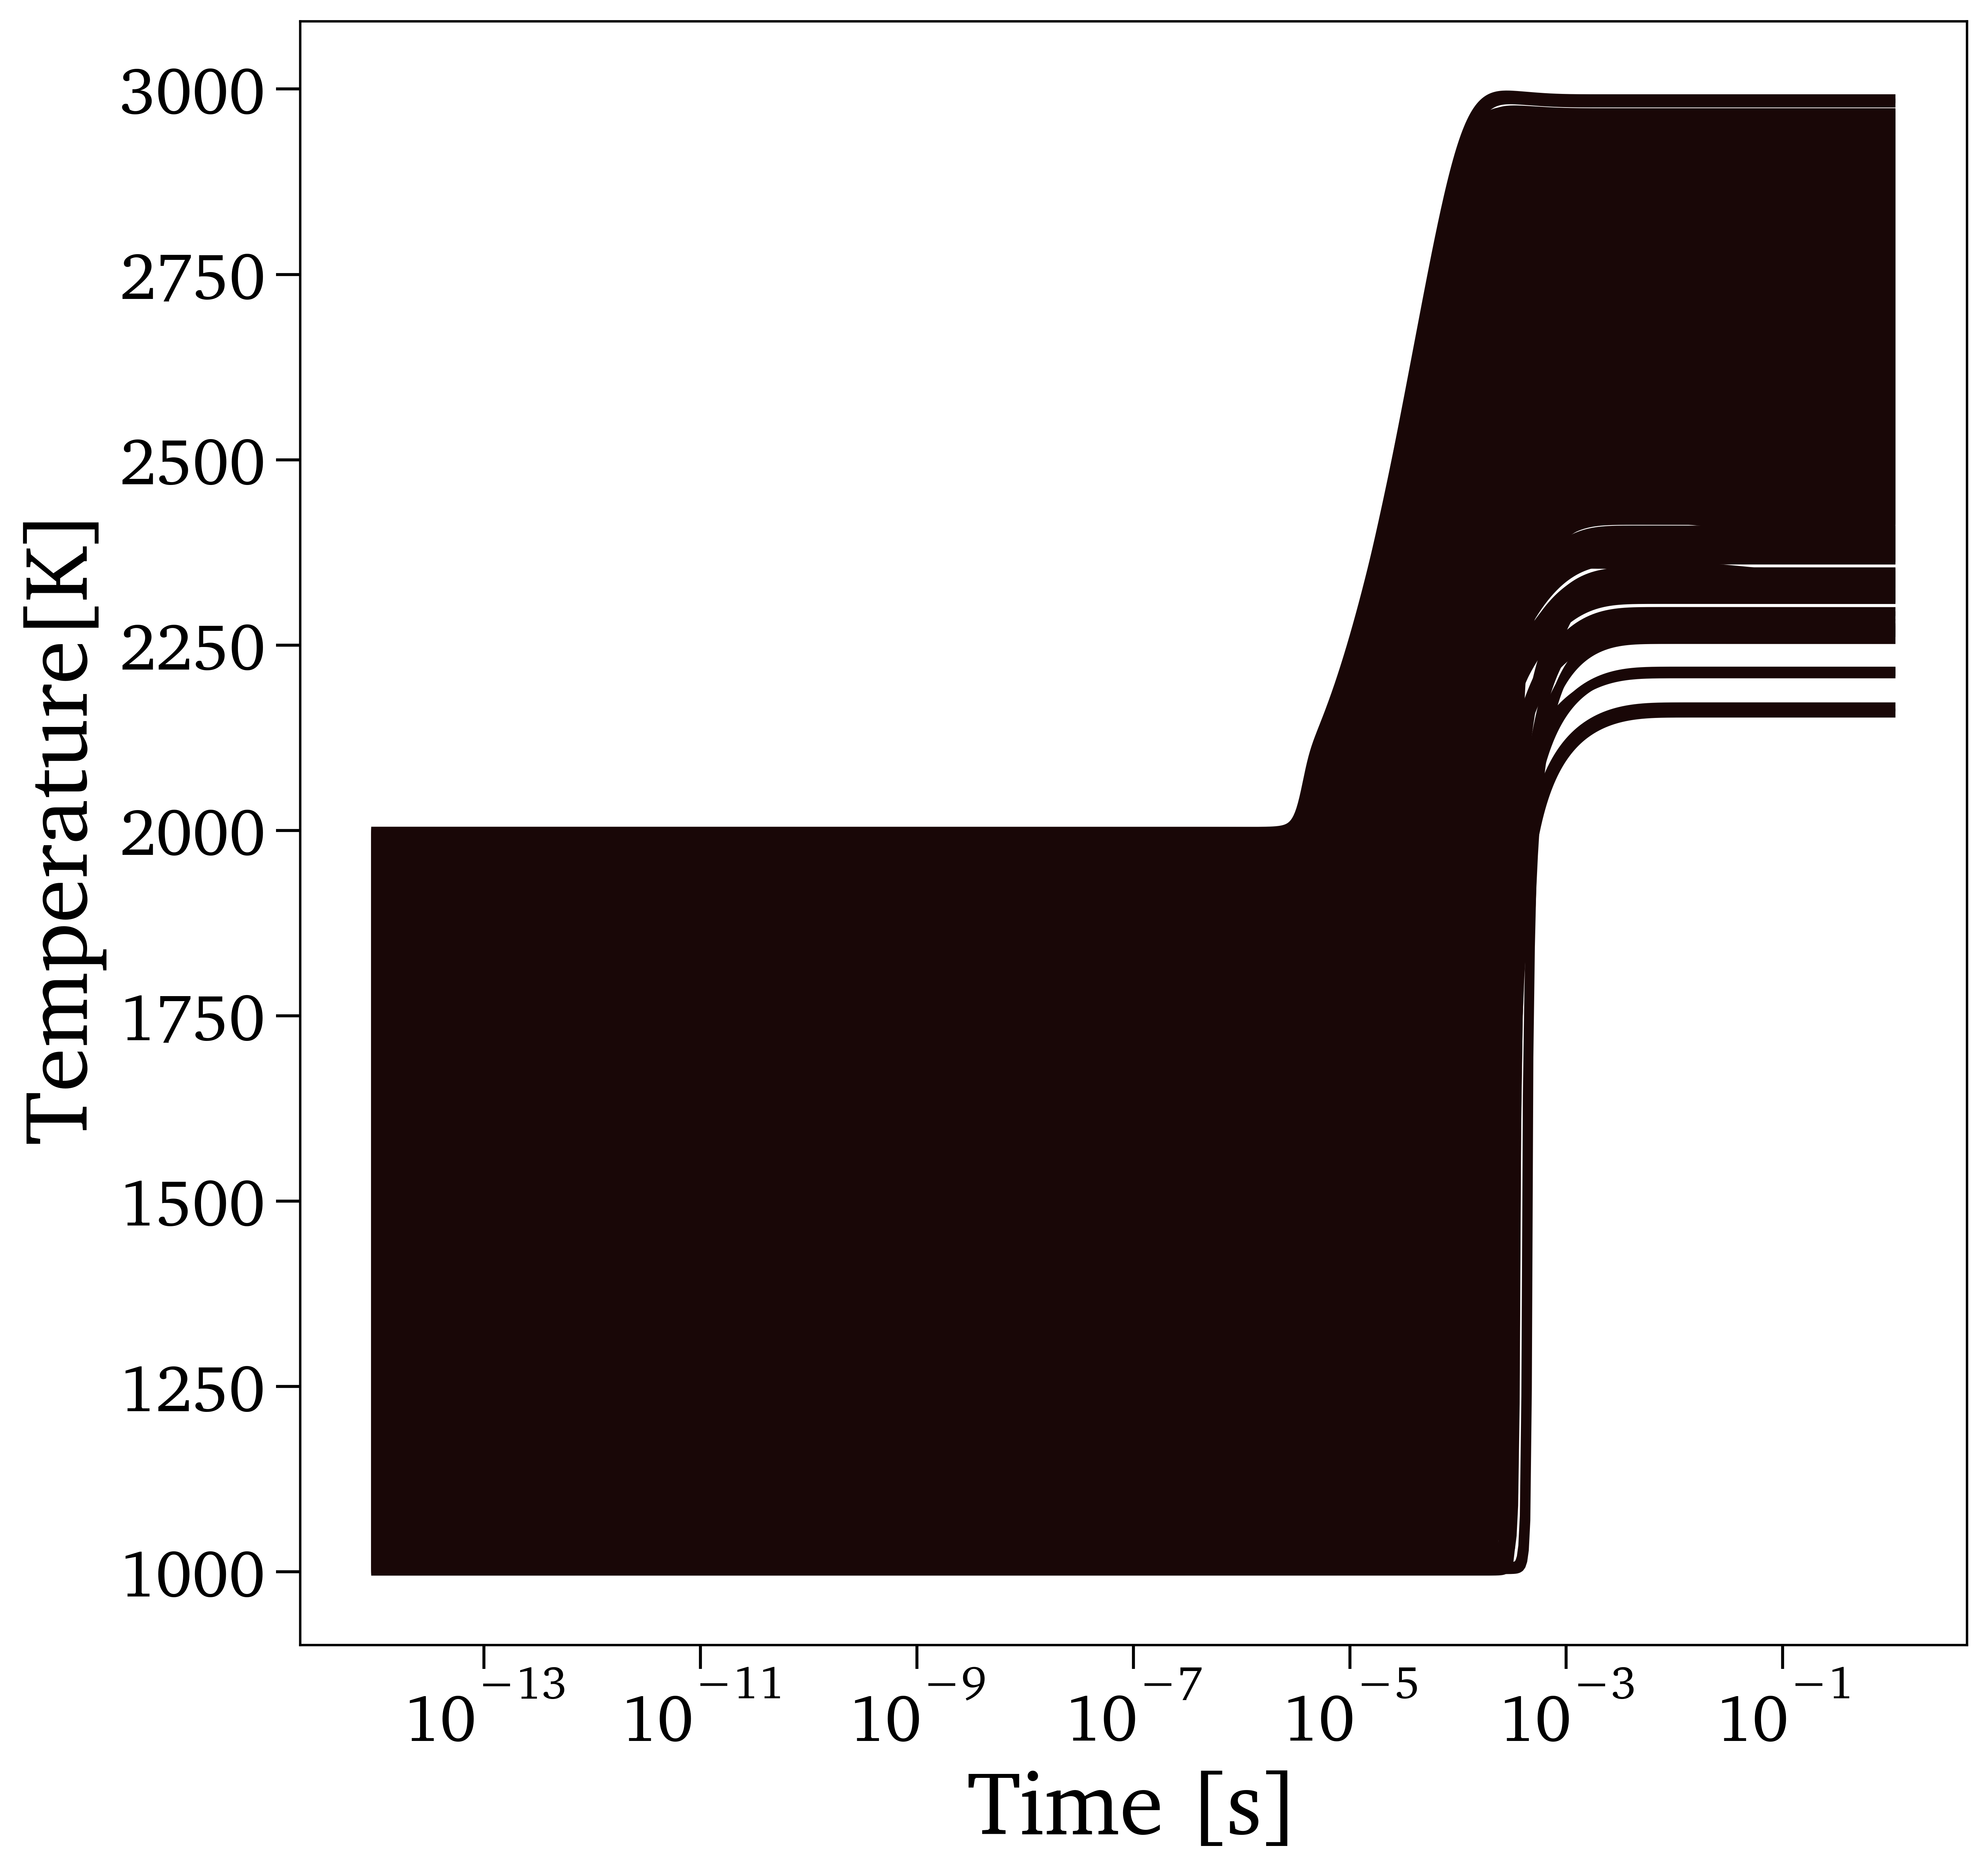

In [5]:
fig  = plt.figure()
for i in CasesVec:
    try:
        Data1 = pd.read_csv(DataDir+'/Orig/'+DataType+'/ext/y.csv.'+str(i+1))

        plt.plot(Data1['t'], Data1['T'], '-', c=ColorVec[0])#, label='T0 = '+"{:.2e}".format(T0sVec[i])+' s')
    except:
        pass
    
    
#     try:
#         Data2 = pd.read_csv(DataDir2+'/Orig/'+DataType+'/ext/y.csv.'+str(i+1))

#         plt.plot(Data2['t'], Data2['T'], '-', c=ColorVec[1])#, label='T0 = '+"{:.2e}".format(T0sVec[i])+' s')
#     except:
#         pass
    
    plt.xlabel('Time [s]')
    plt.ylabel(r'$Temperature [K]$')
    #plt.legend()
    plt.xscale('log')
    
    #if (FigDir):
    #    plt.savefig(FigDir+'/0DReact_'+DataType+'Data_T.eps', format='eps', bbox_inches='tight')

## Plotting Mass Fractions

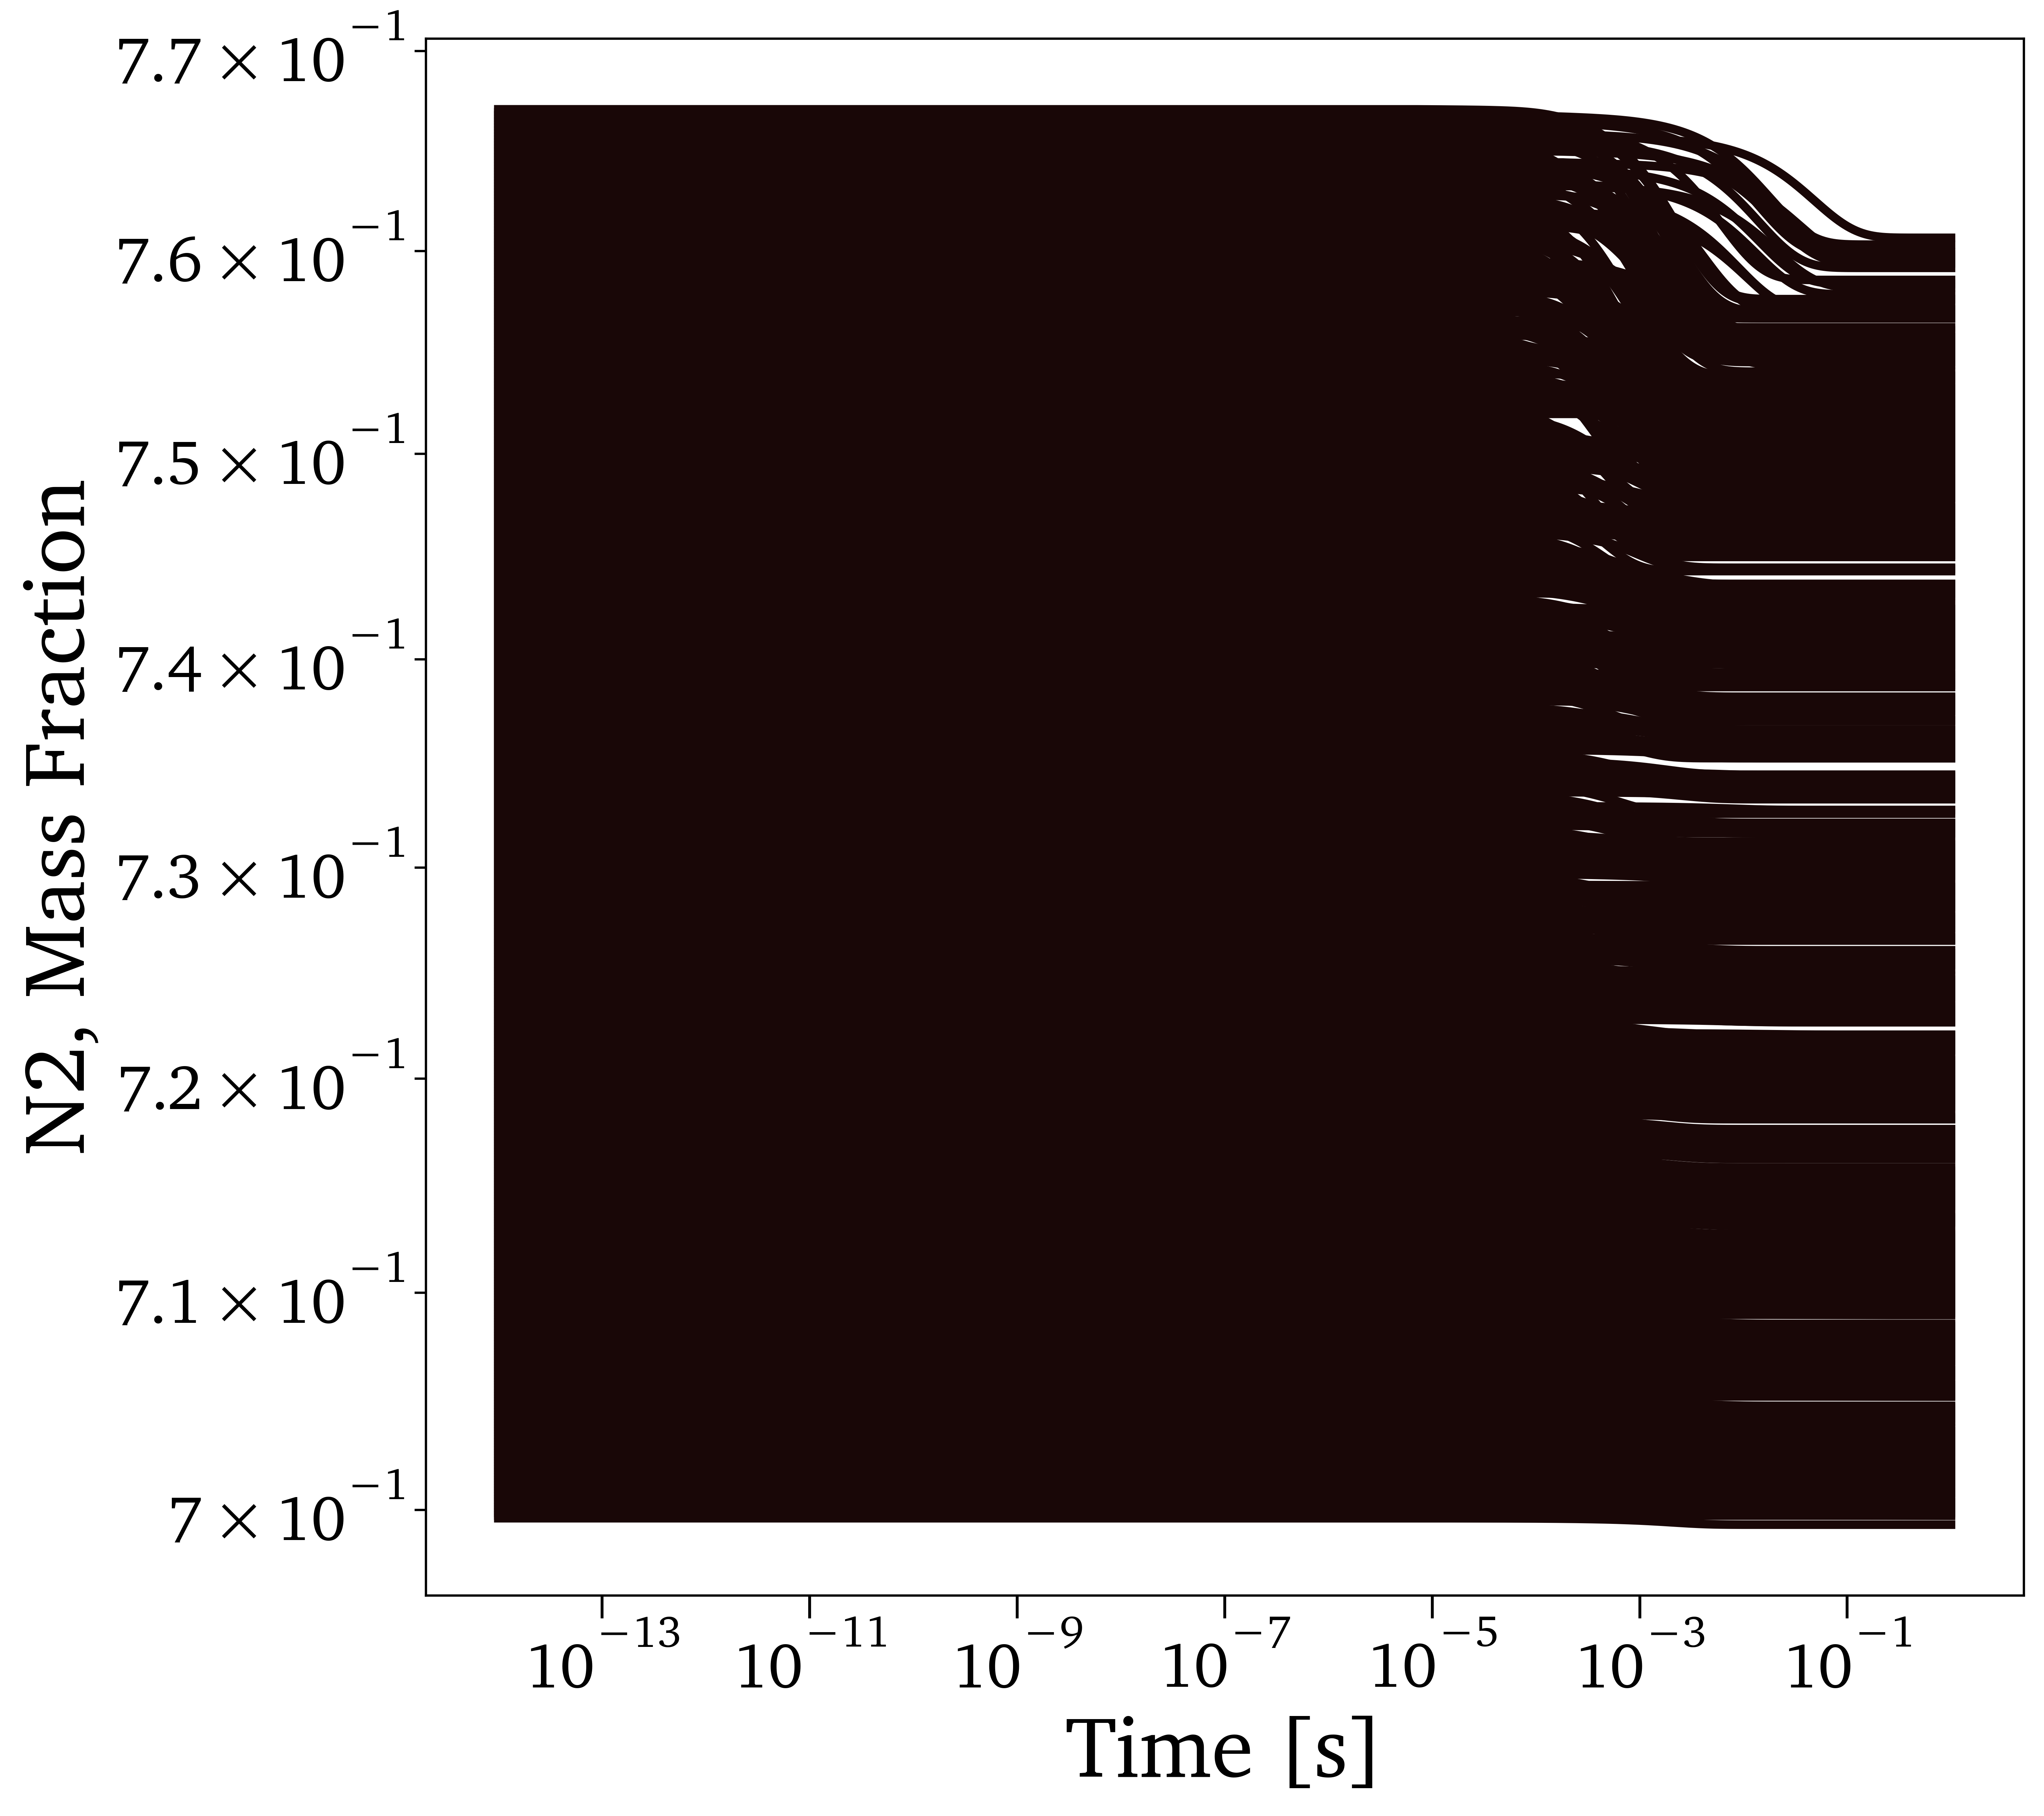

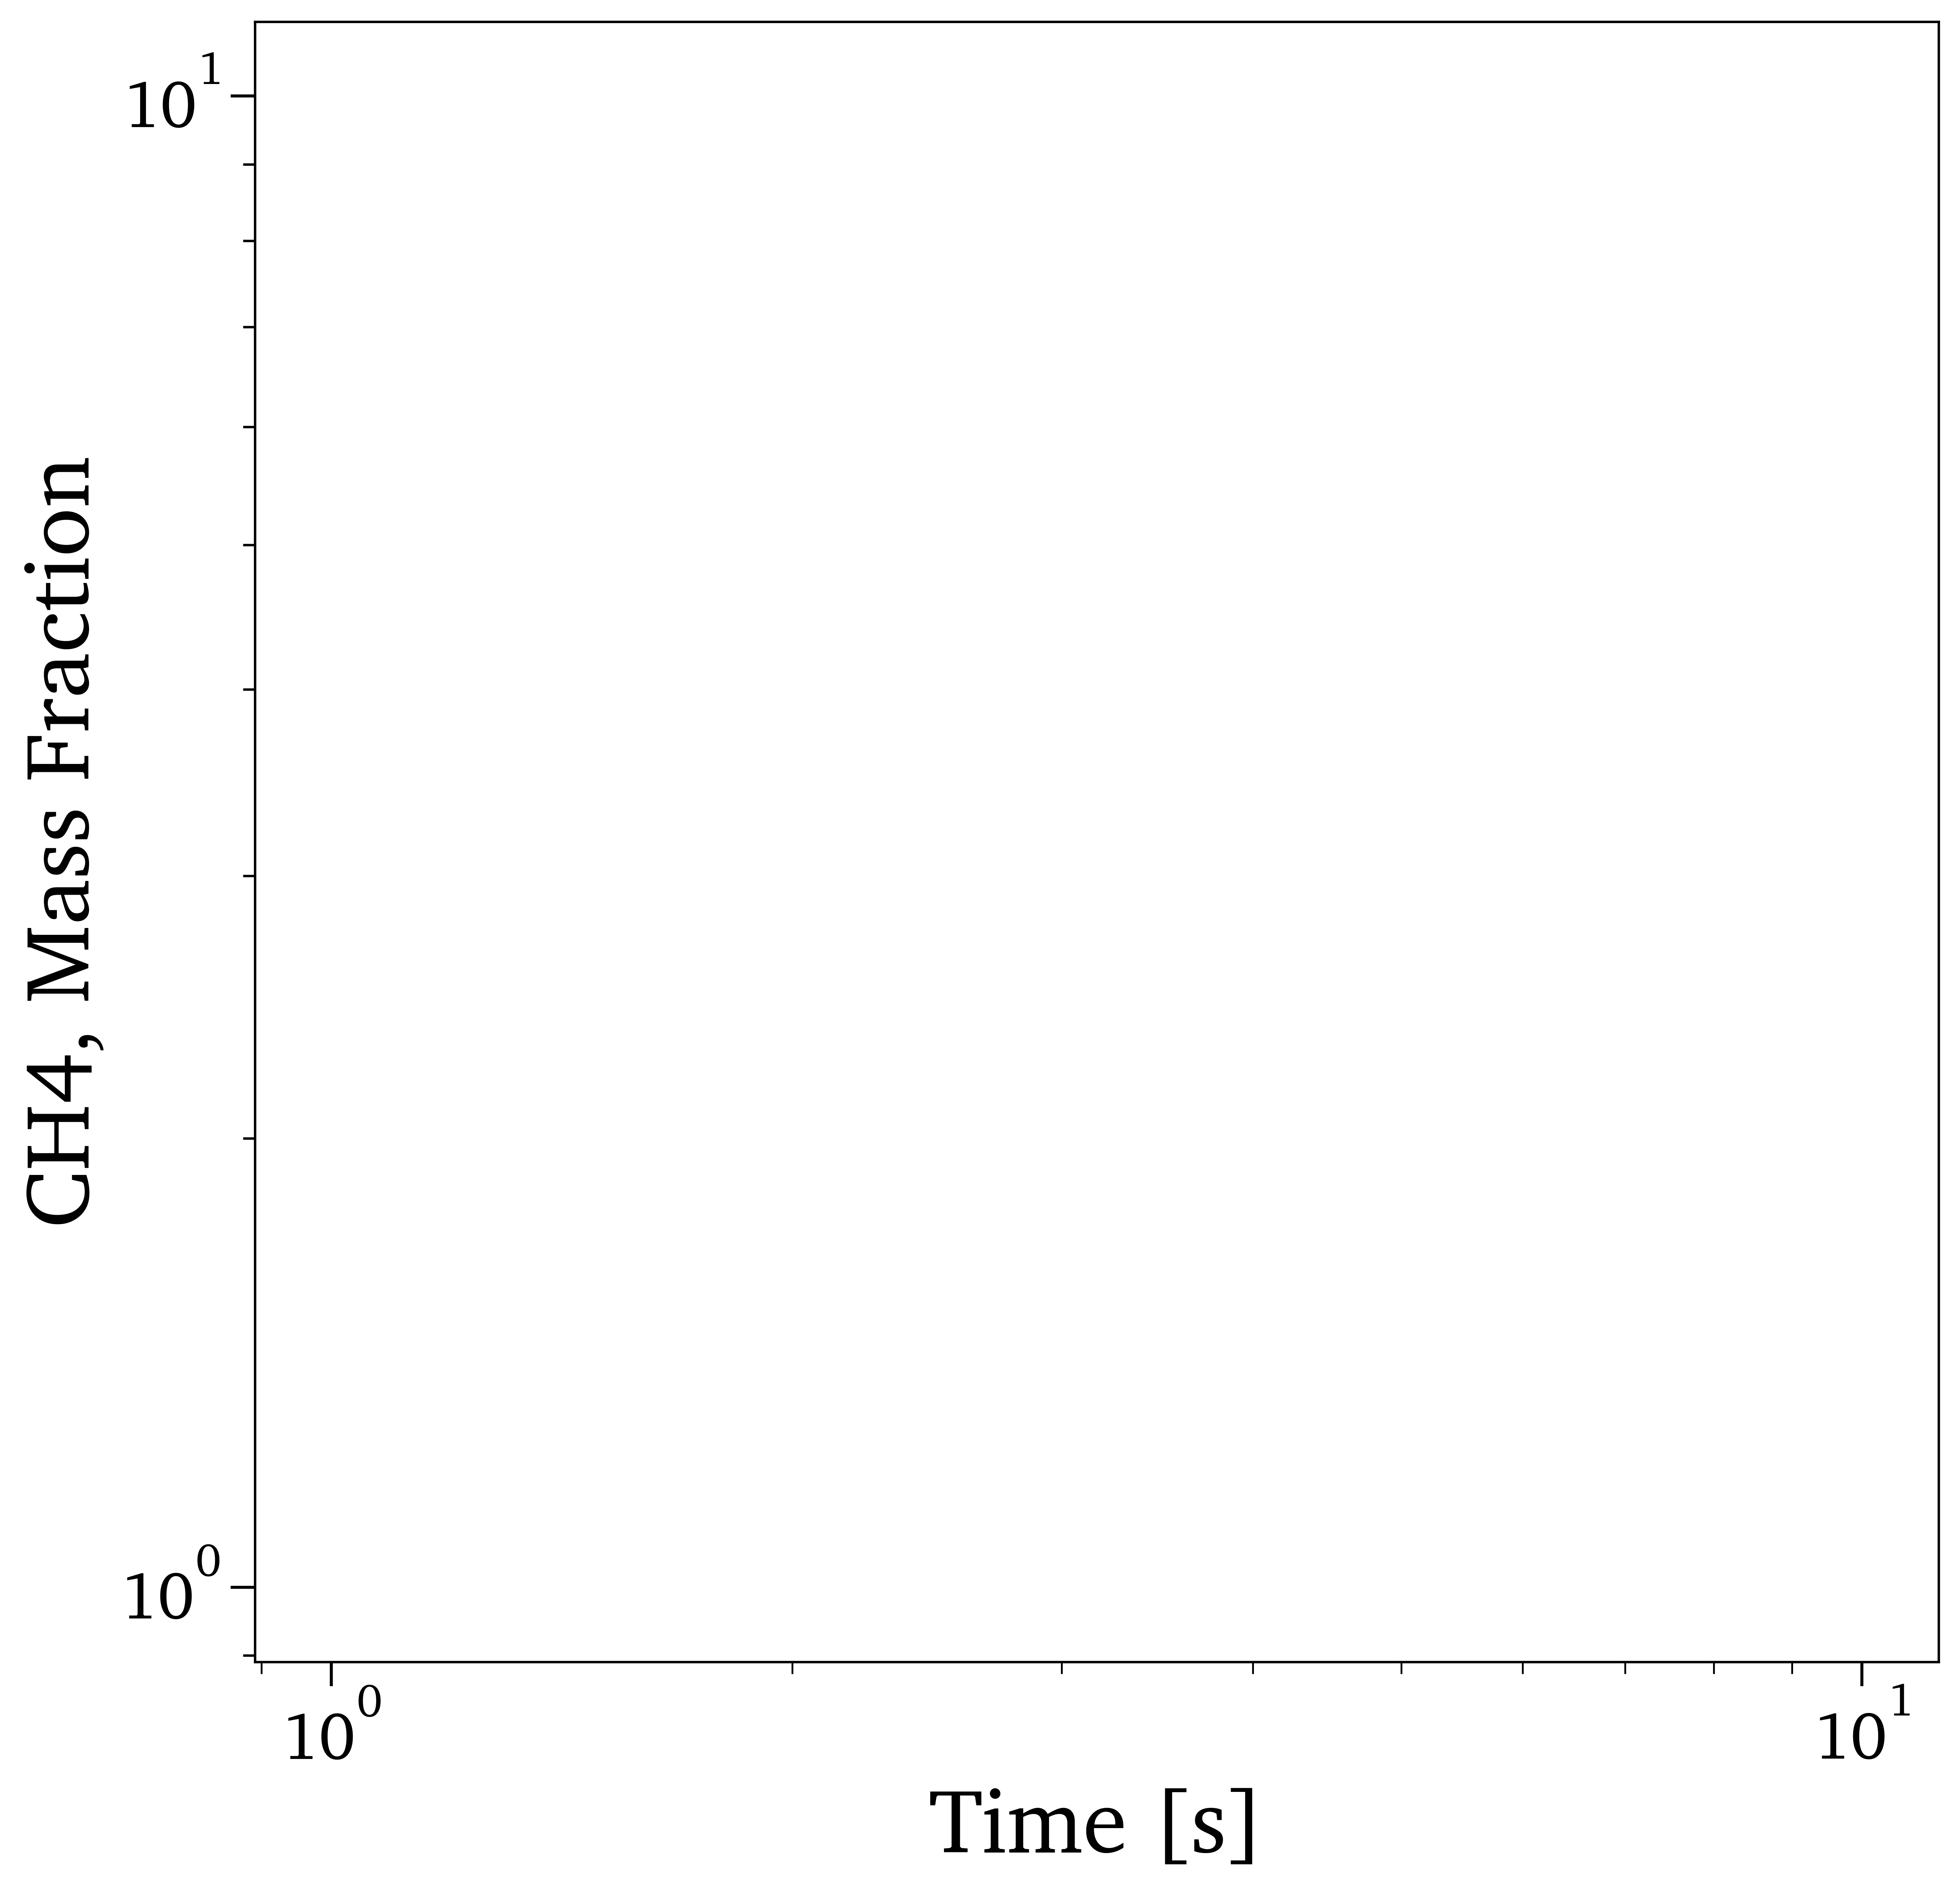

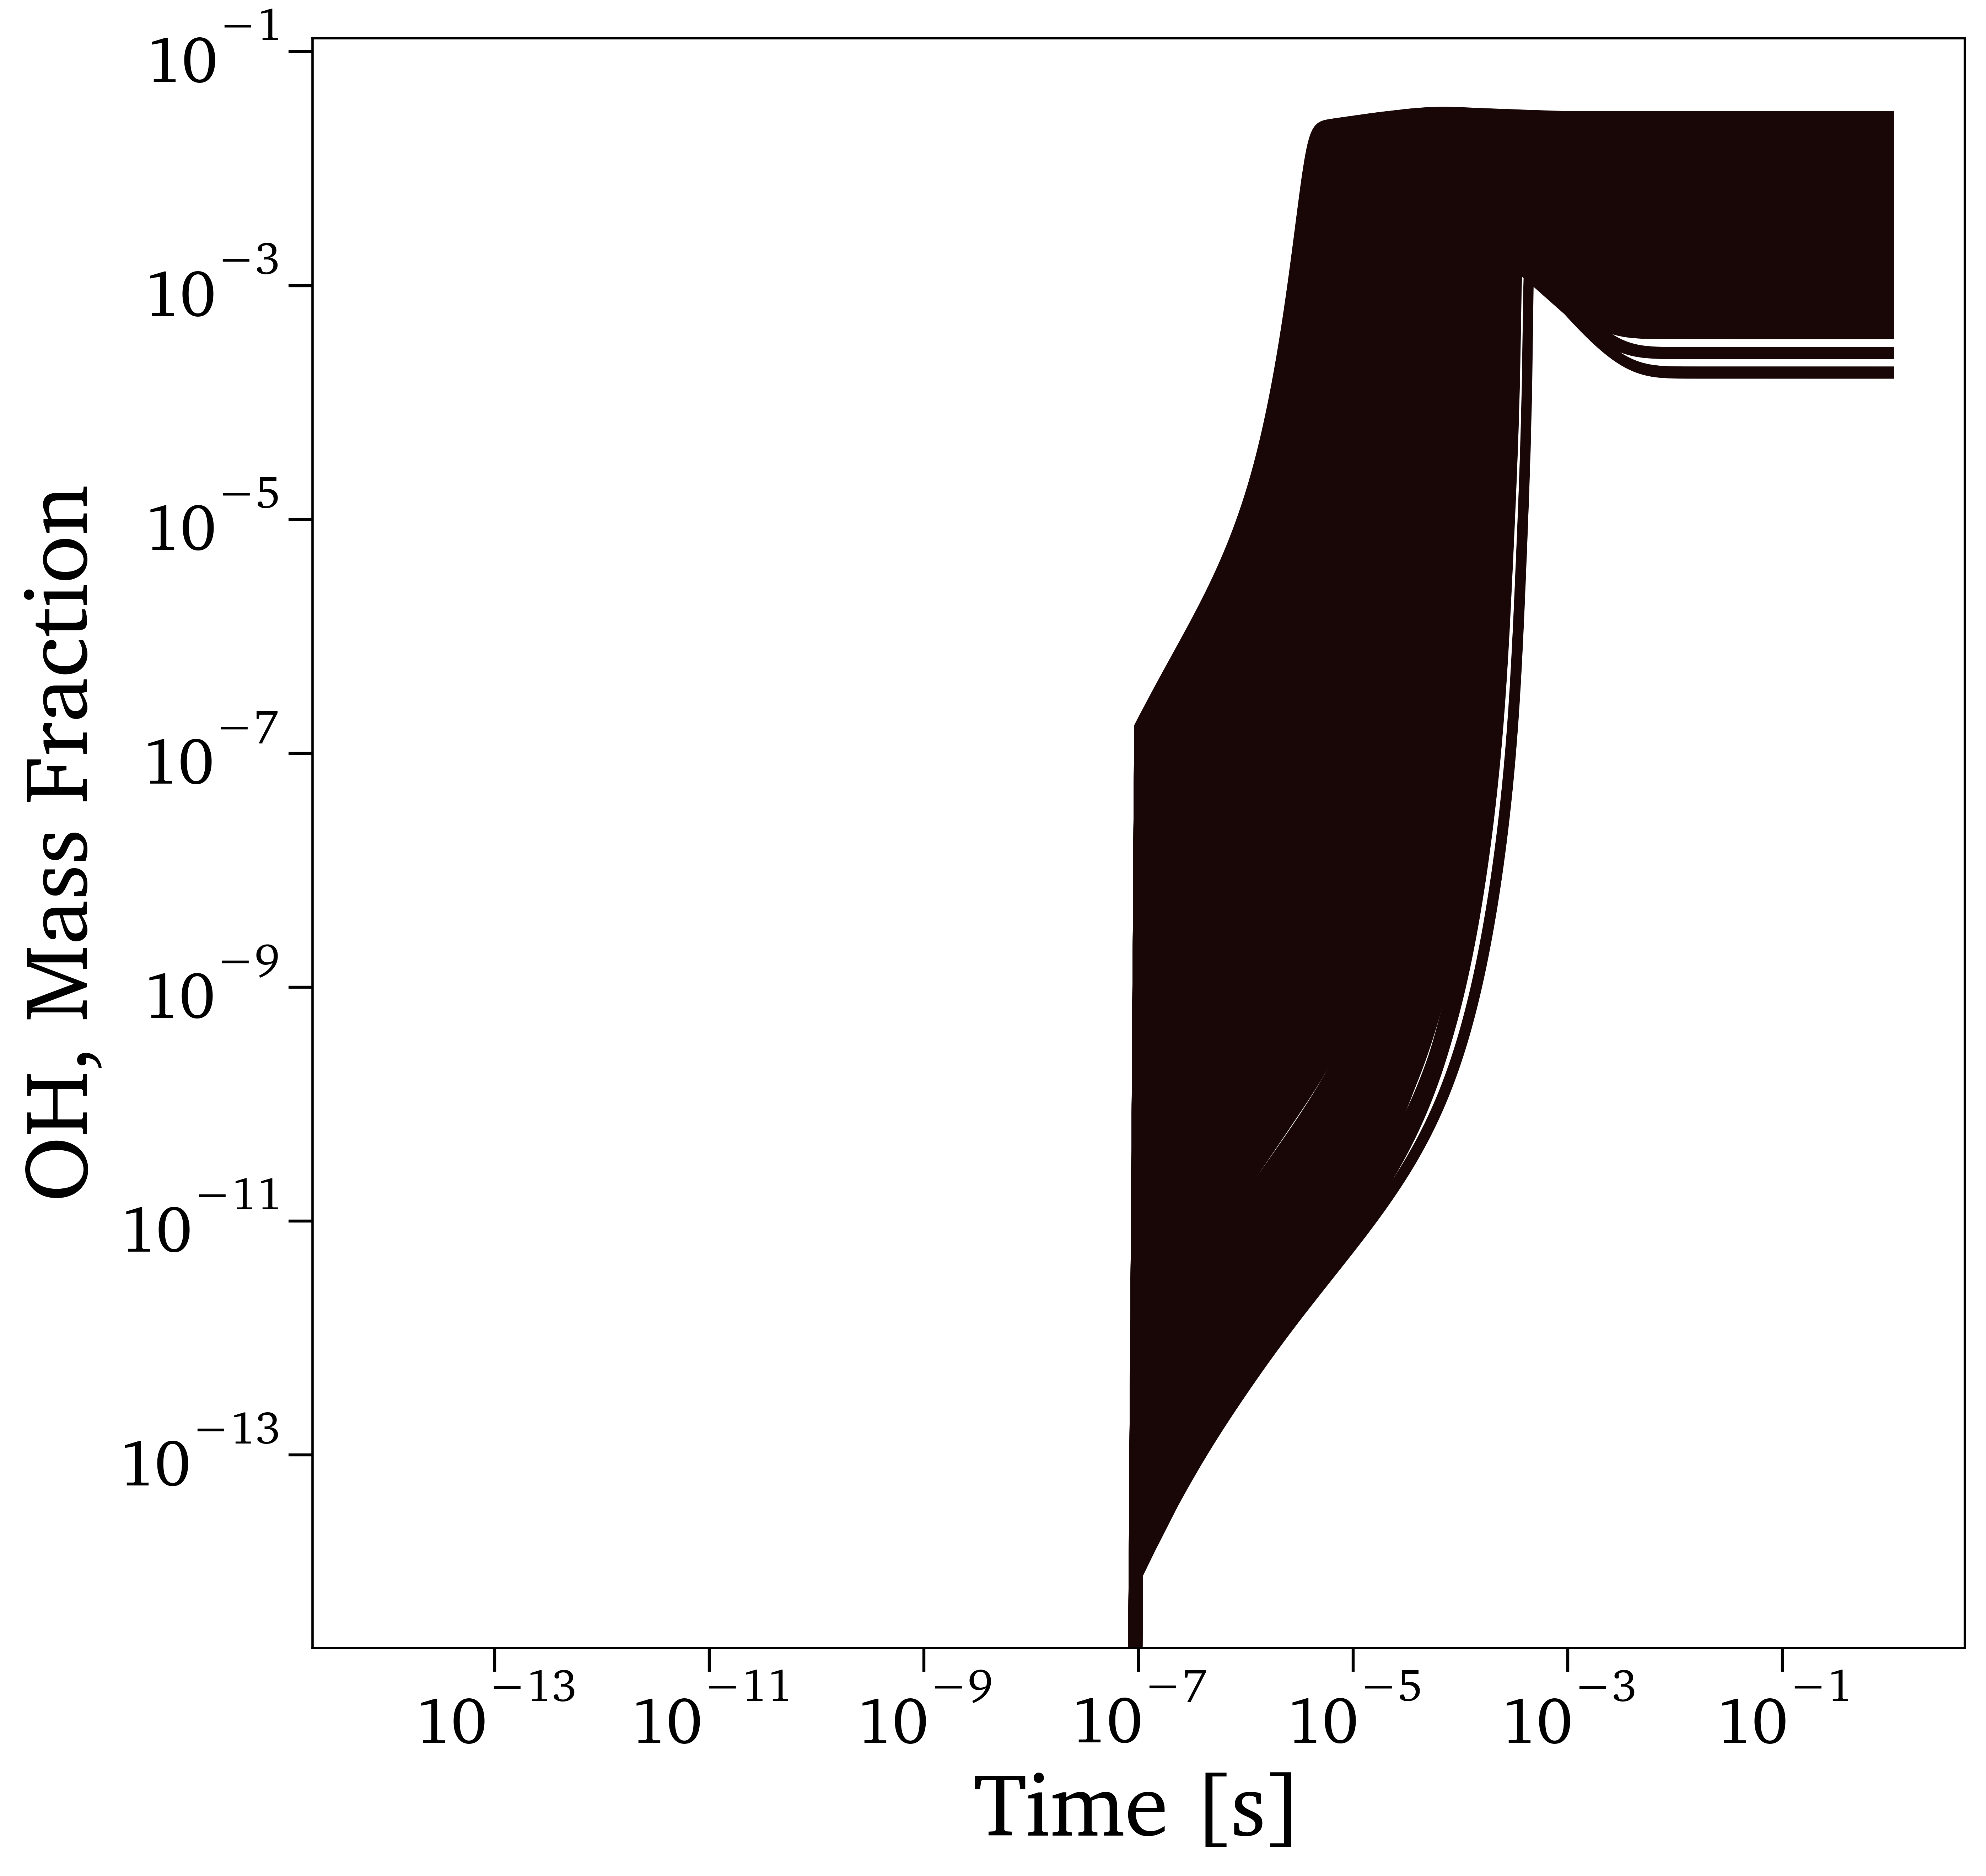

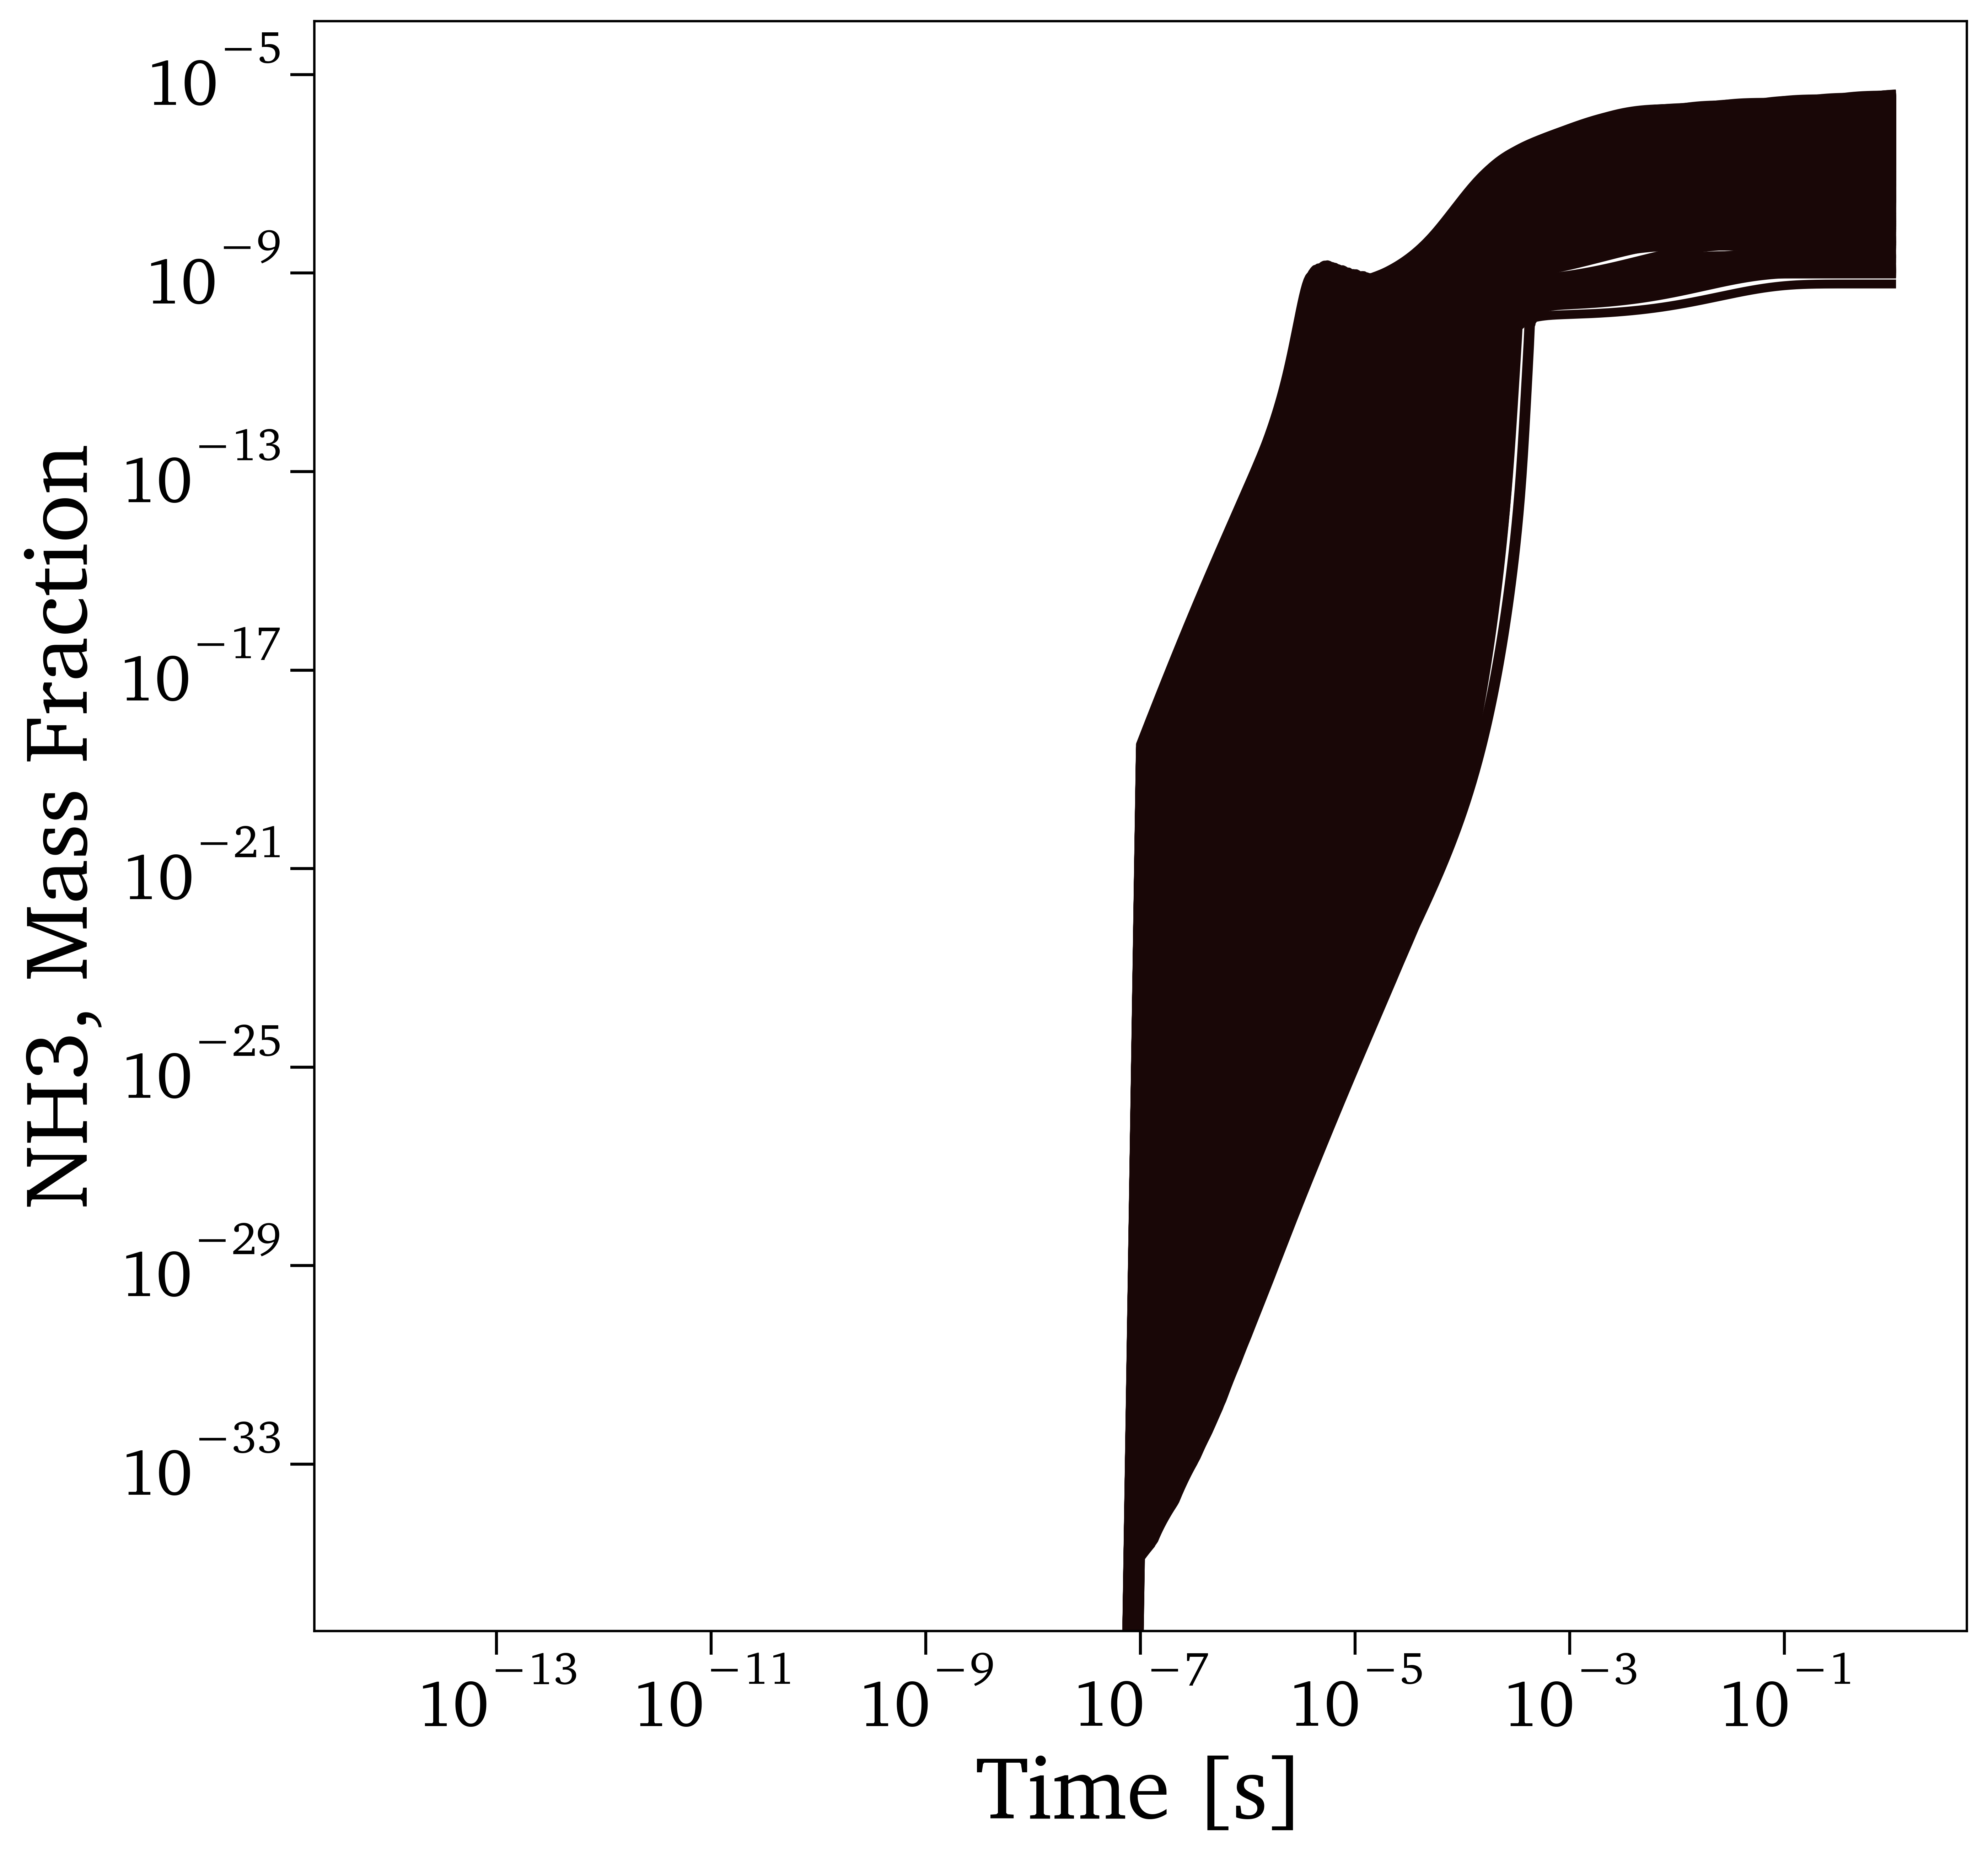

In [6]:
VarOIVec = ['N2','CH4','OH','NH3']#['H2', 'H', 'O', 'O2', 'OH', 'H2O', 'HO2', 'H2O2', 'N', 'NH', 'NH2', 'NH3', 'NNH', 'NO', 'NO2', 'N2O', 'HNO', 'N2']

for VarOI in VarOIVec:
    
    fig  = plt.figure()
    for i in CasesVec:
        try:
            Data1 = pd.read_csv(DataDir+'/Orig/'+DataType+'/ext/y.csv.'+str(i+1))

            plt.plot(Data1.t, Data1[VarOI], '-', c=ColorVec[0])#, label='t = '+"{:.2e}".format(T0sVec[i])+' s')
        except:
            pass

        plt.xlabel('Time [s]')
        plt.ylabel(r''+VarOI+', Mass Fraction')
        #plt.legend()
        plt.xscale('log')
        plt.yscale('log')
        
        #if (FigDir):
        #    plt.savefig(FigDir+'/0DReact_'+DataType+'Data_'+VarOI+'.eps', format='eps', bbox_inches='tight')

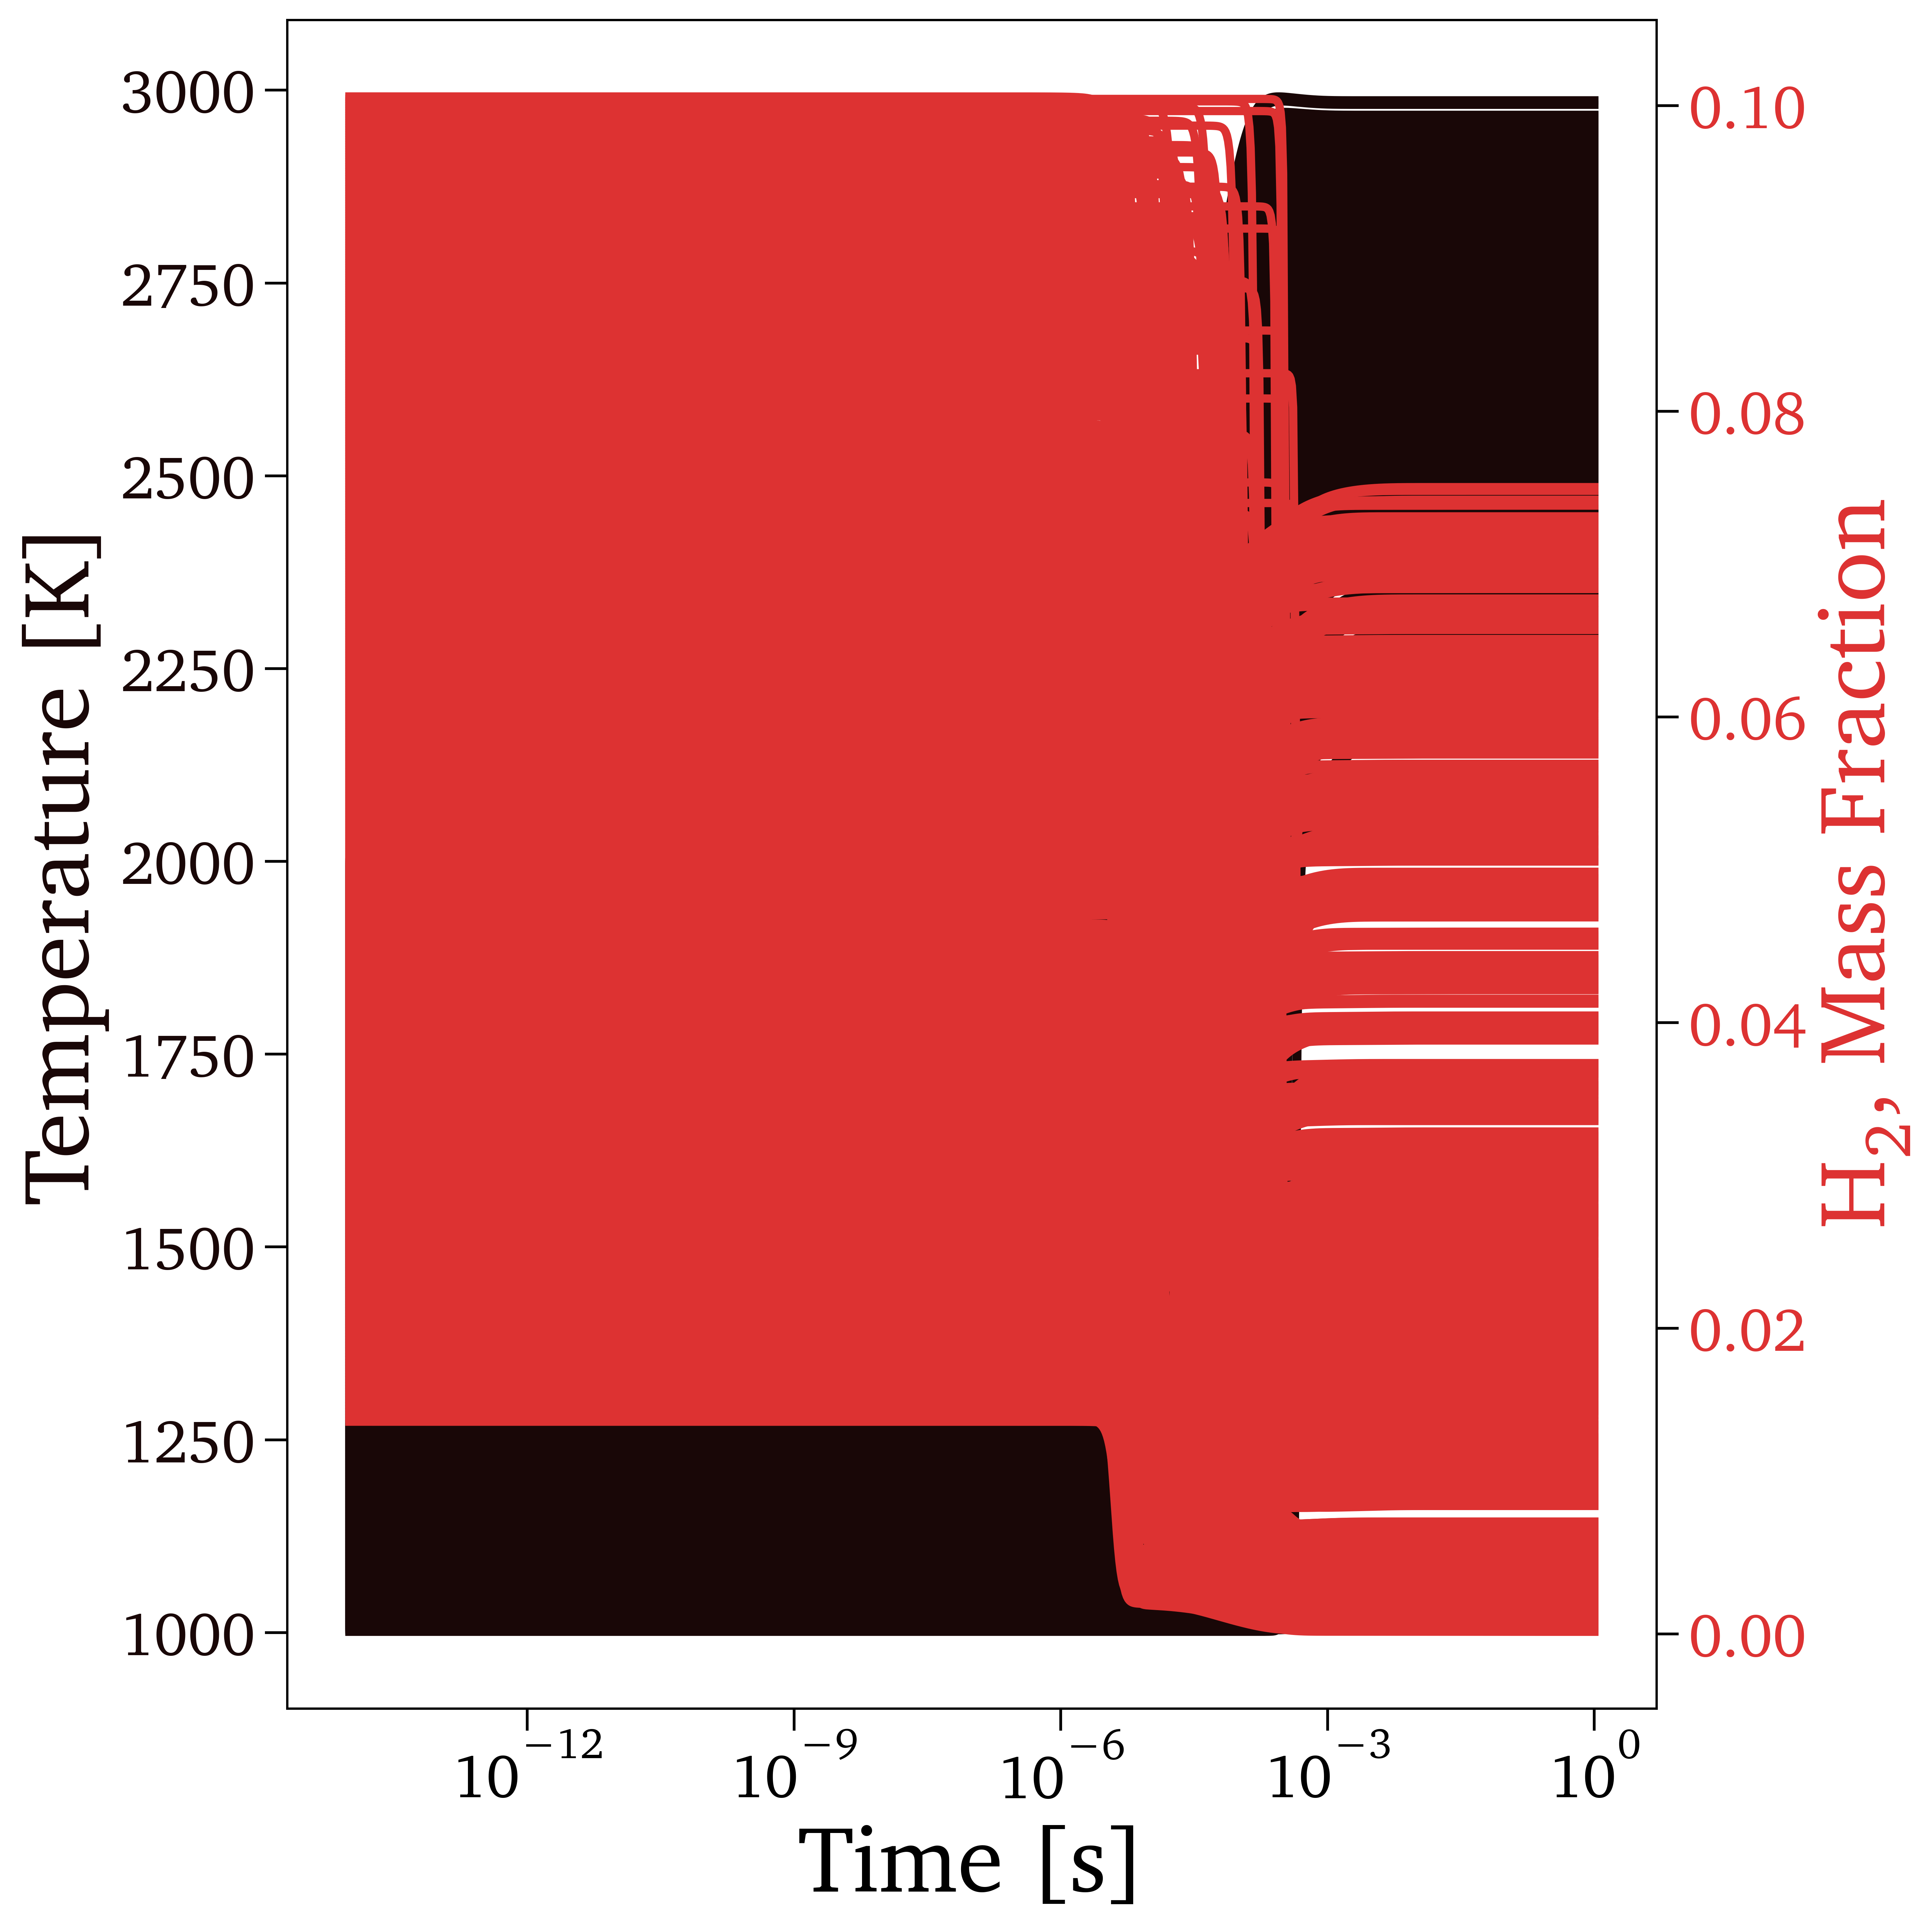

In [7]:
VarOIVec  = ['T', 'H2']
#VarOIVec  = ['H', 'NH3']
ColorVecB = ['#848484', '#DF7401'] 

ii       = 0
fig, ax1 = plt.subplots()
ax       = [ax1]
ax.append(ax[0].twinx())  # instantiate a second axes that shares the same x-axis
for VarOI in VarOIVec:
    
    iVar     = VarNames.index(VarOI)

    jTest = 0
    for iTest in CasesVec:

        FileName     = DataDir +'/Orig/'+DataType+'/ext/y.csv.'+str(iTest+1)
        Data         = pd.read_csv(FileName, header=0)
        tVec         = Data.to_numpy()[:,0]
        yMat         = Data.to_numpy()[:,1:]
        VarOrig      = list(Data.columns)
        iVarOrig     = VarOrig.index(VarOI)-1

        color = ColorVec[ii]
        ax[ii].plot(tVec, yMat[:,iVarOrig], '-', c=color)

        # if tVec[-1] > 3.e-1:
        #     print('iTest = ', iTest)

        jTest += 1
        
    ii += 1


color = ColorVec[0]
ax[0].set_xlabel('Time [s]', size=34)
ax[0].set_ylabel('Temperature [K]', color=color, size=34)
#ax[0].set_ylabel(r'$H$, Mass Fraction', color=color, size=34)  # we already handled the x-label with ax1
ax[0].tick_params(axis='y', labelcolor=color)
#ax[0].set_ylim([1000.,3500.])
ax[0].set_xscale('log')

color =  ColorVec[1]
ax[1].set_ylabel('H${}_2$, Mass Fraction', color=color, size=34)  # we already handled the x-label with ax1
#ax[1].set_ylabel(r'$NH_3$, Mass Fraction', color=color, size=34)  # we already handled the x-label with ax1
ax[1].tick_params(axis='y', labelcolor=color)
#ax[1].set_ylim([-0.2,0.1])
ax[1].set_xscale('log')


fig.tight_layout()  # otherwise the right y-label is slightly clipped


if (FigDir):
    plt.savefig(FigDir+'/0DReact_'+DataType+'Data_TandH2.eps', format='eps', bbox_inches='tight')
    #plt.savefig(FigDir+'/0DReact_'+DataType+'Data_NandNH3.eps', format='eps', bbox_inches='tight')

## Plotting Principal Components

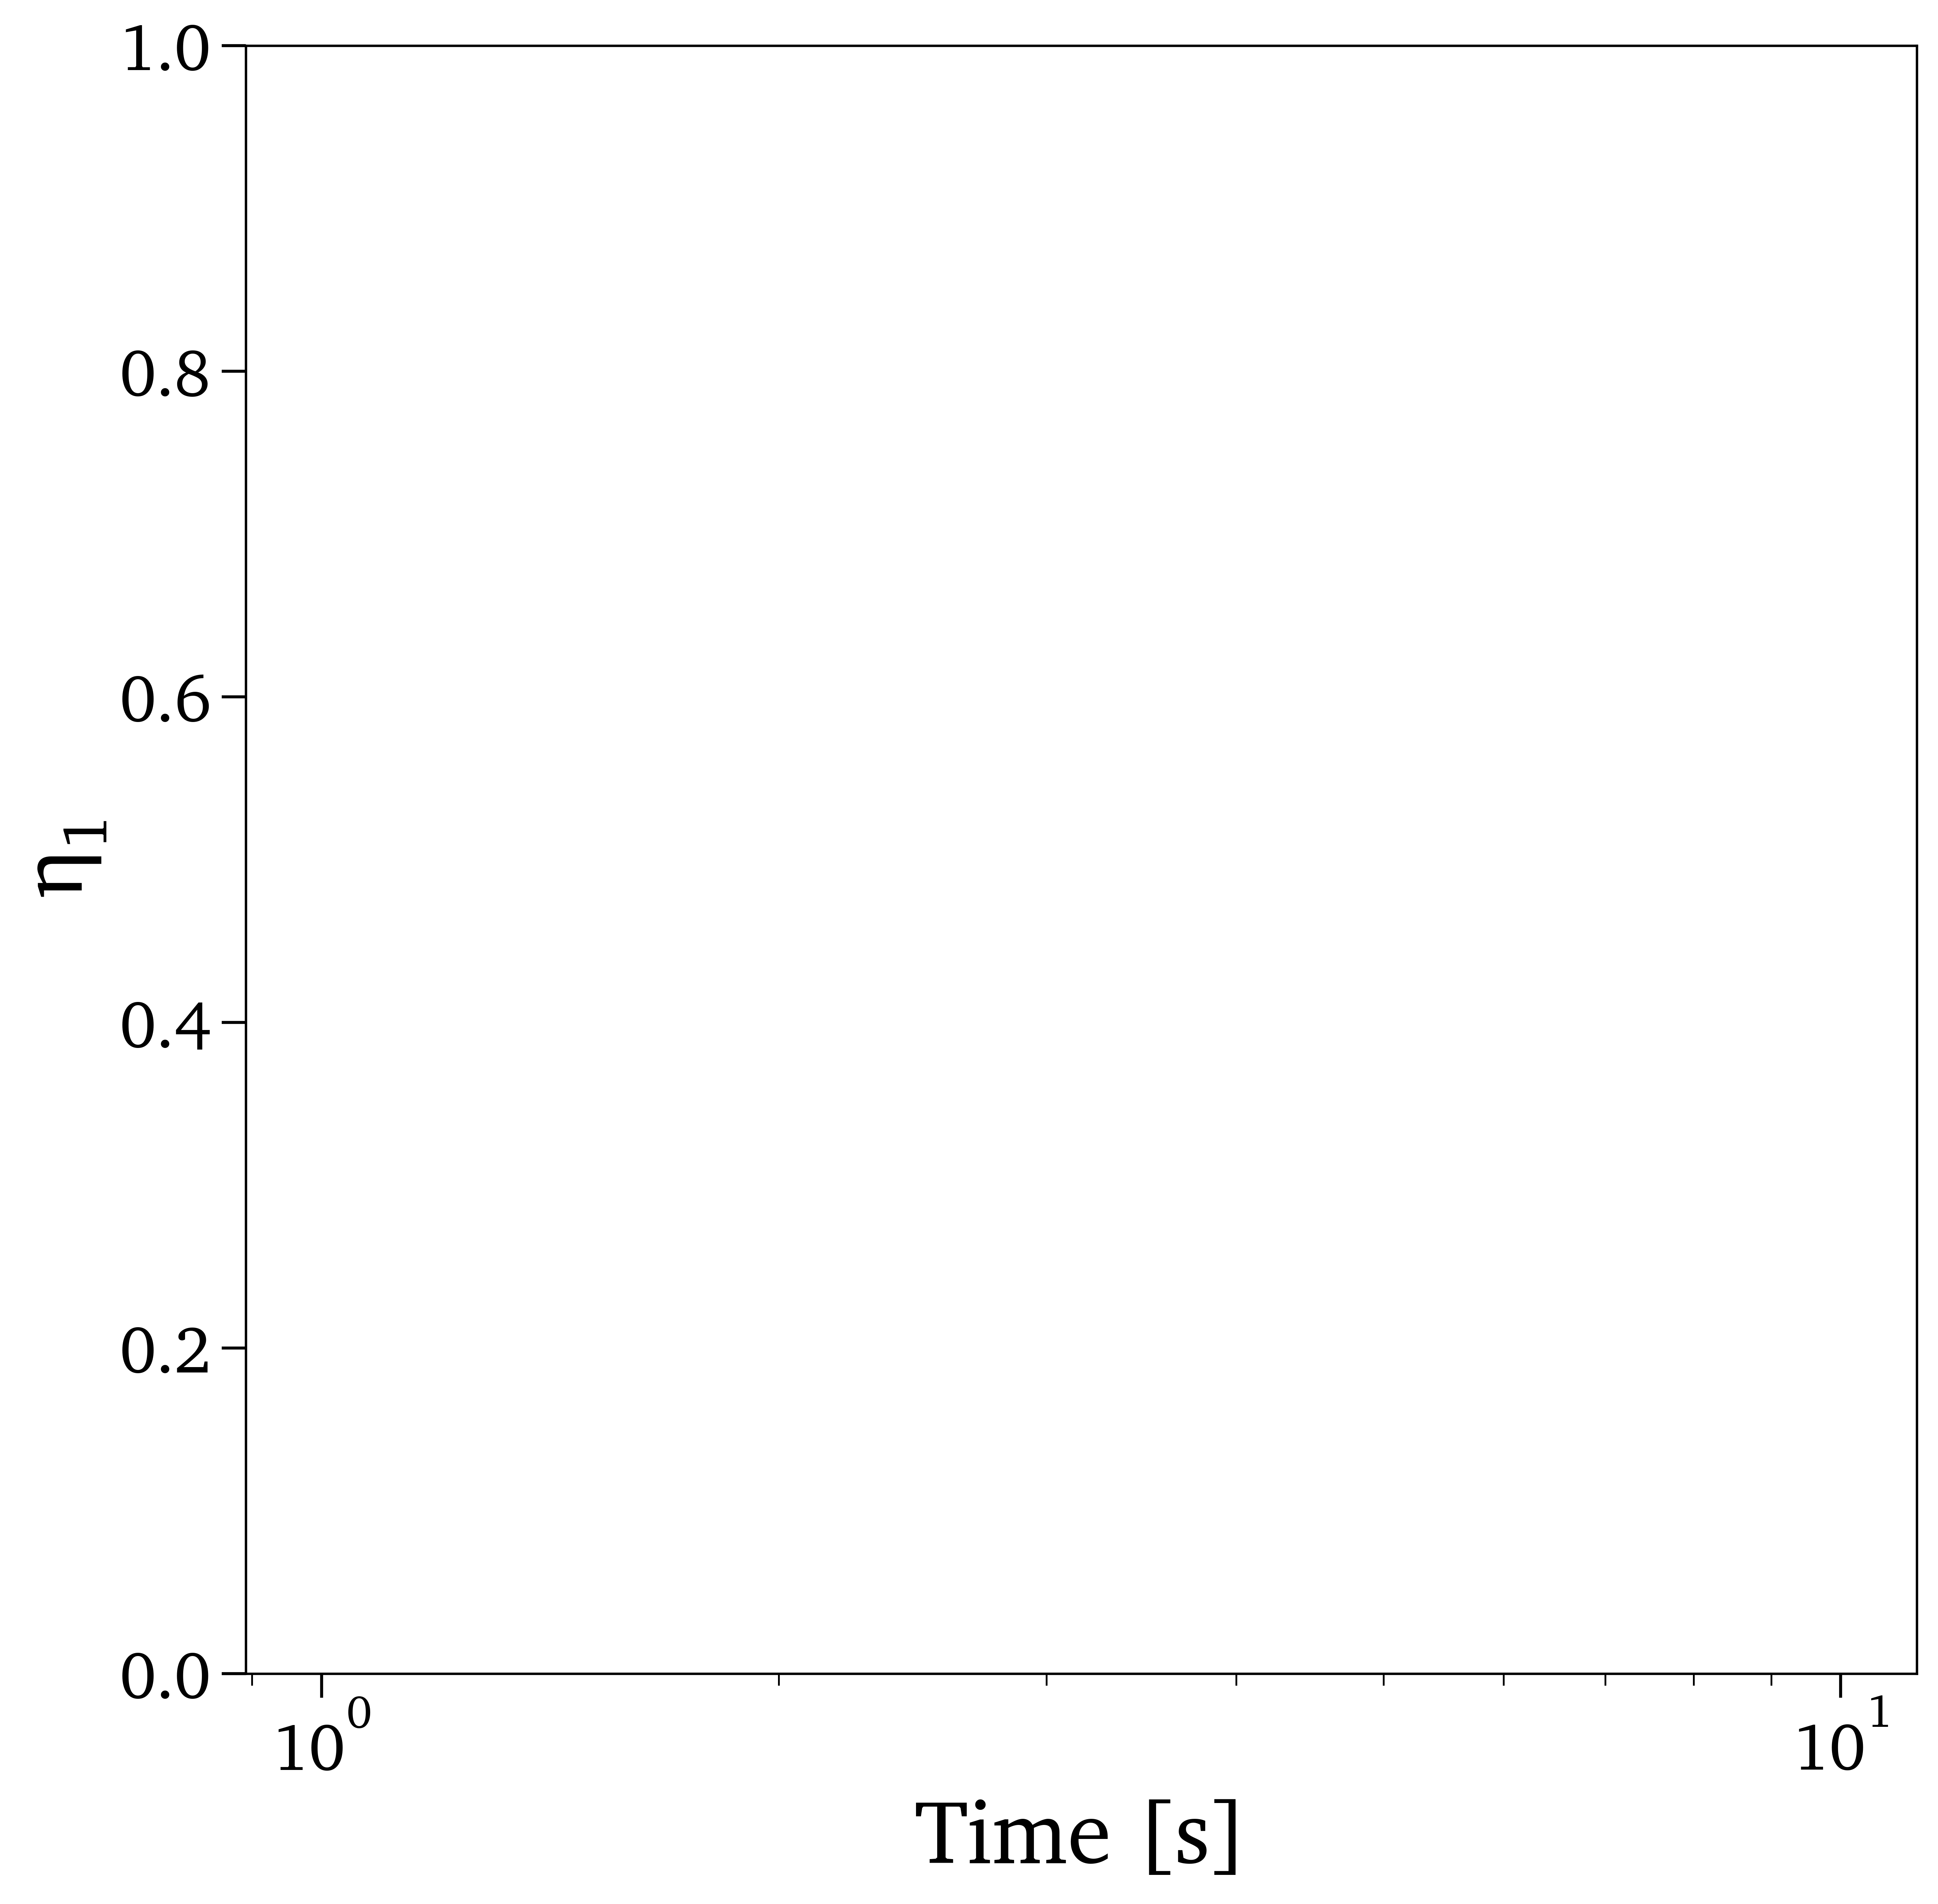

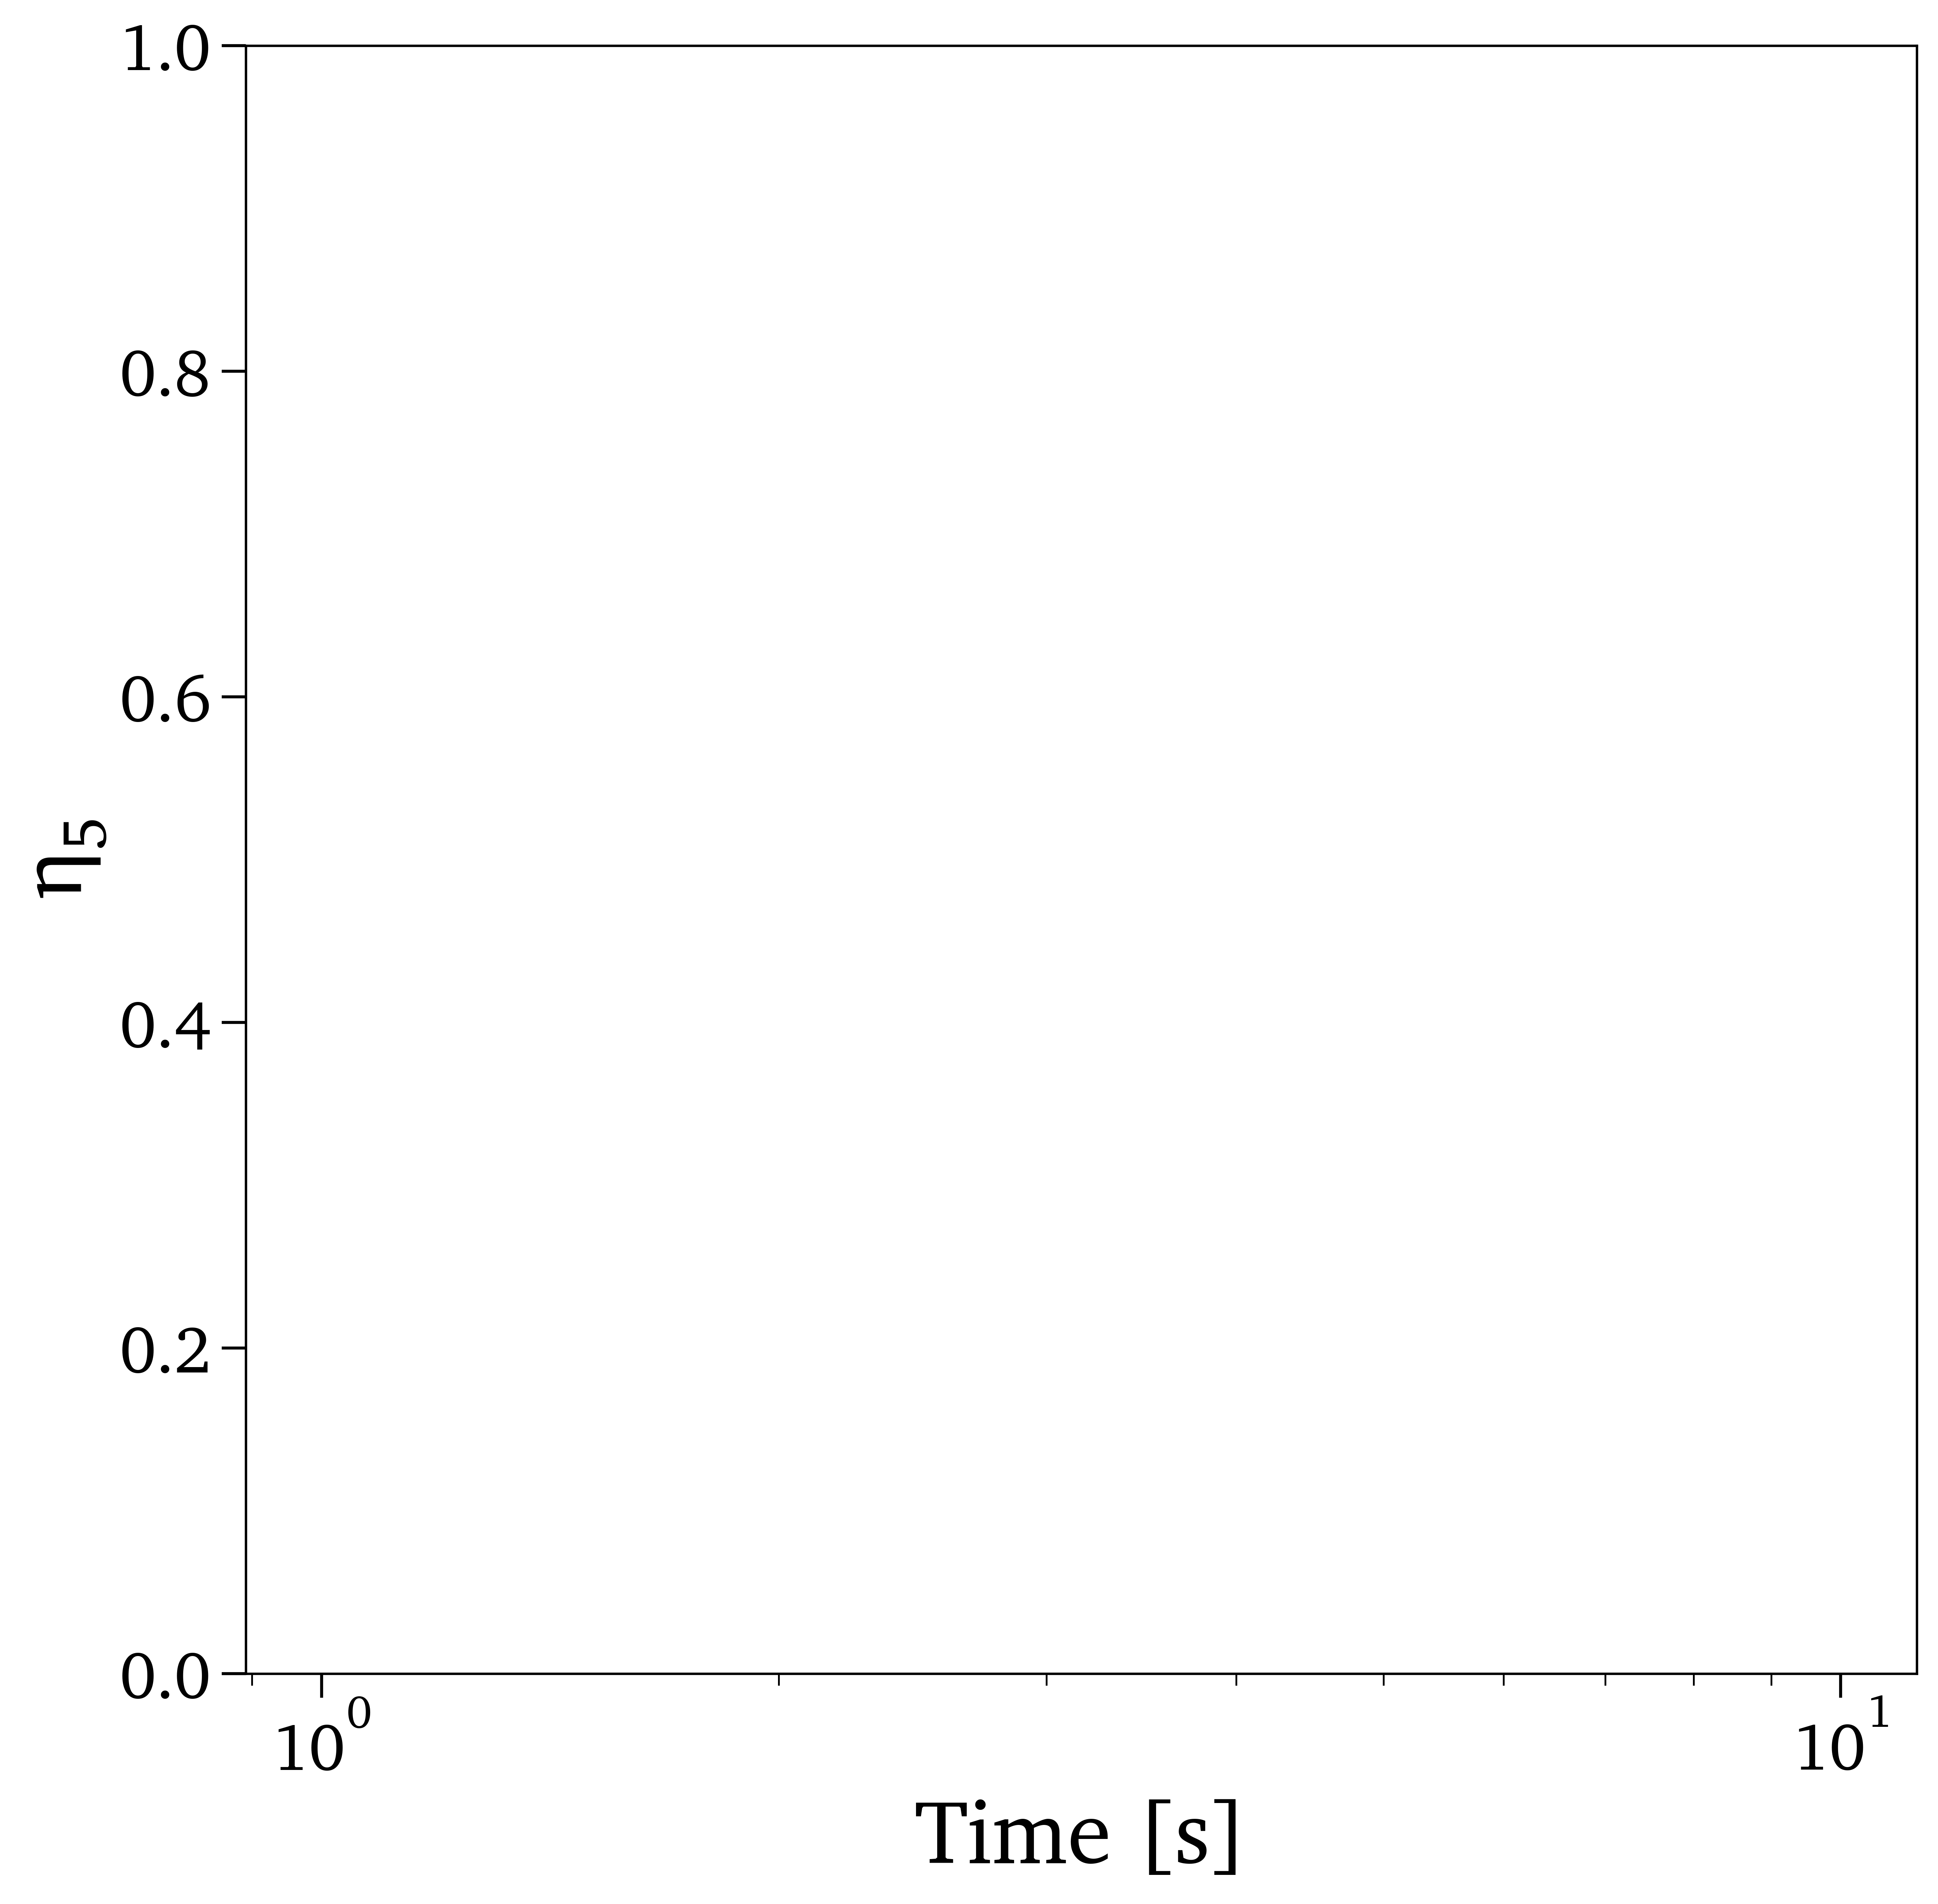

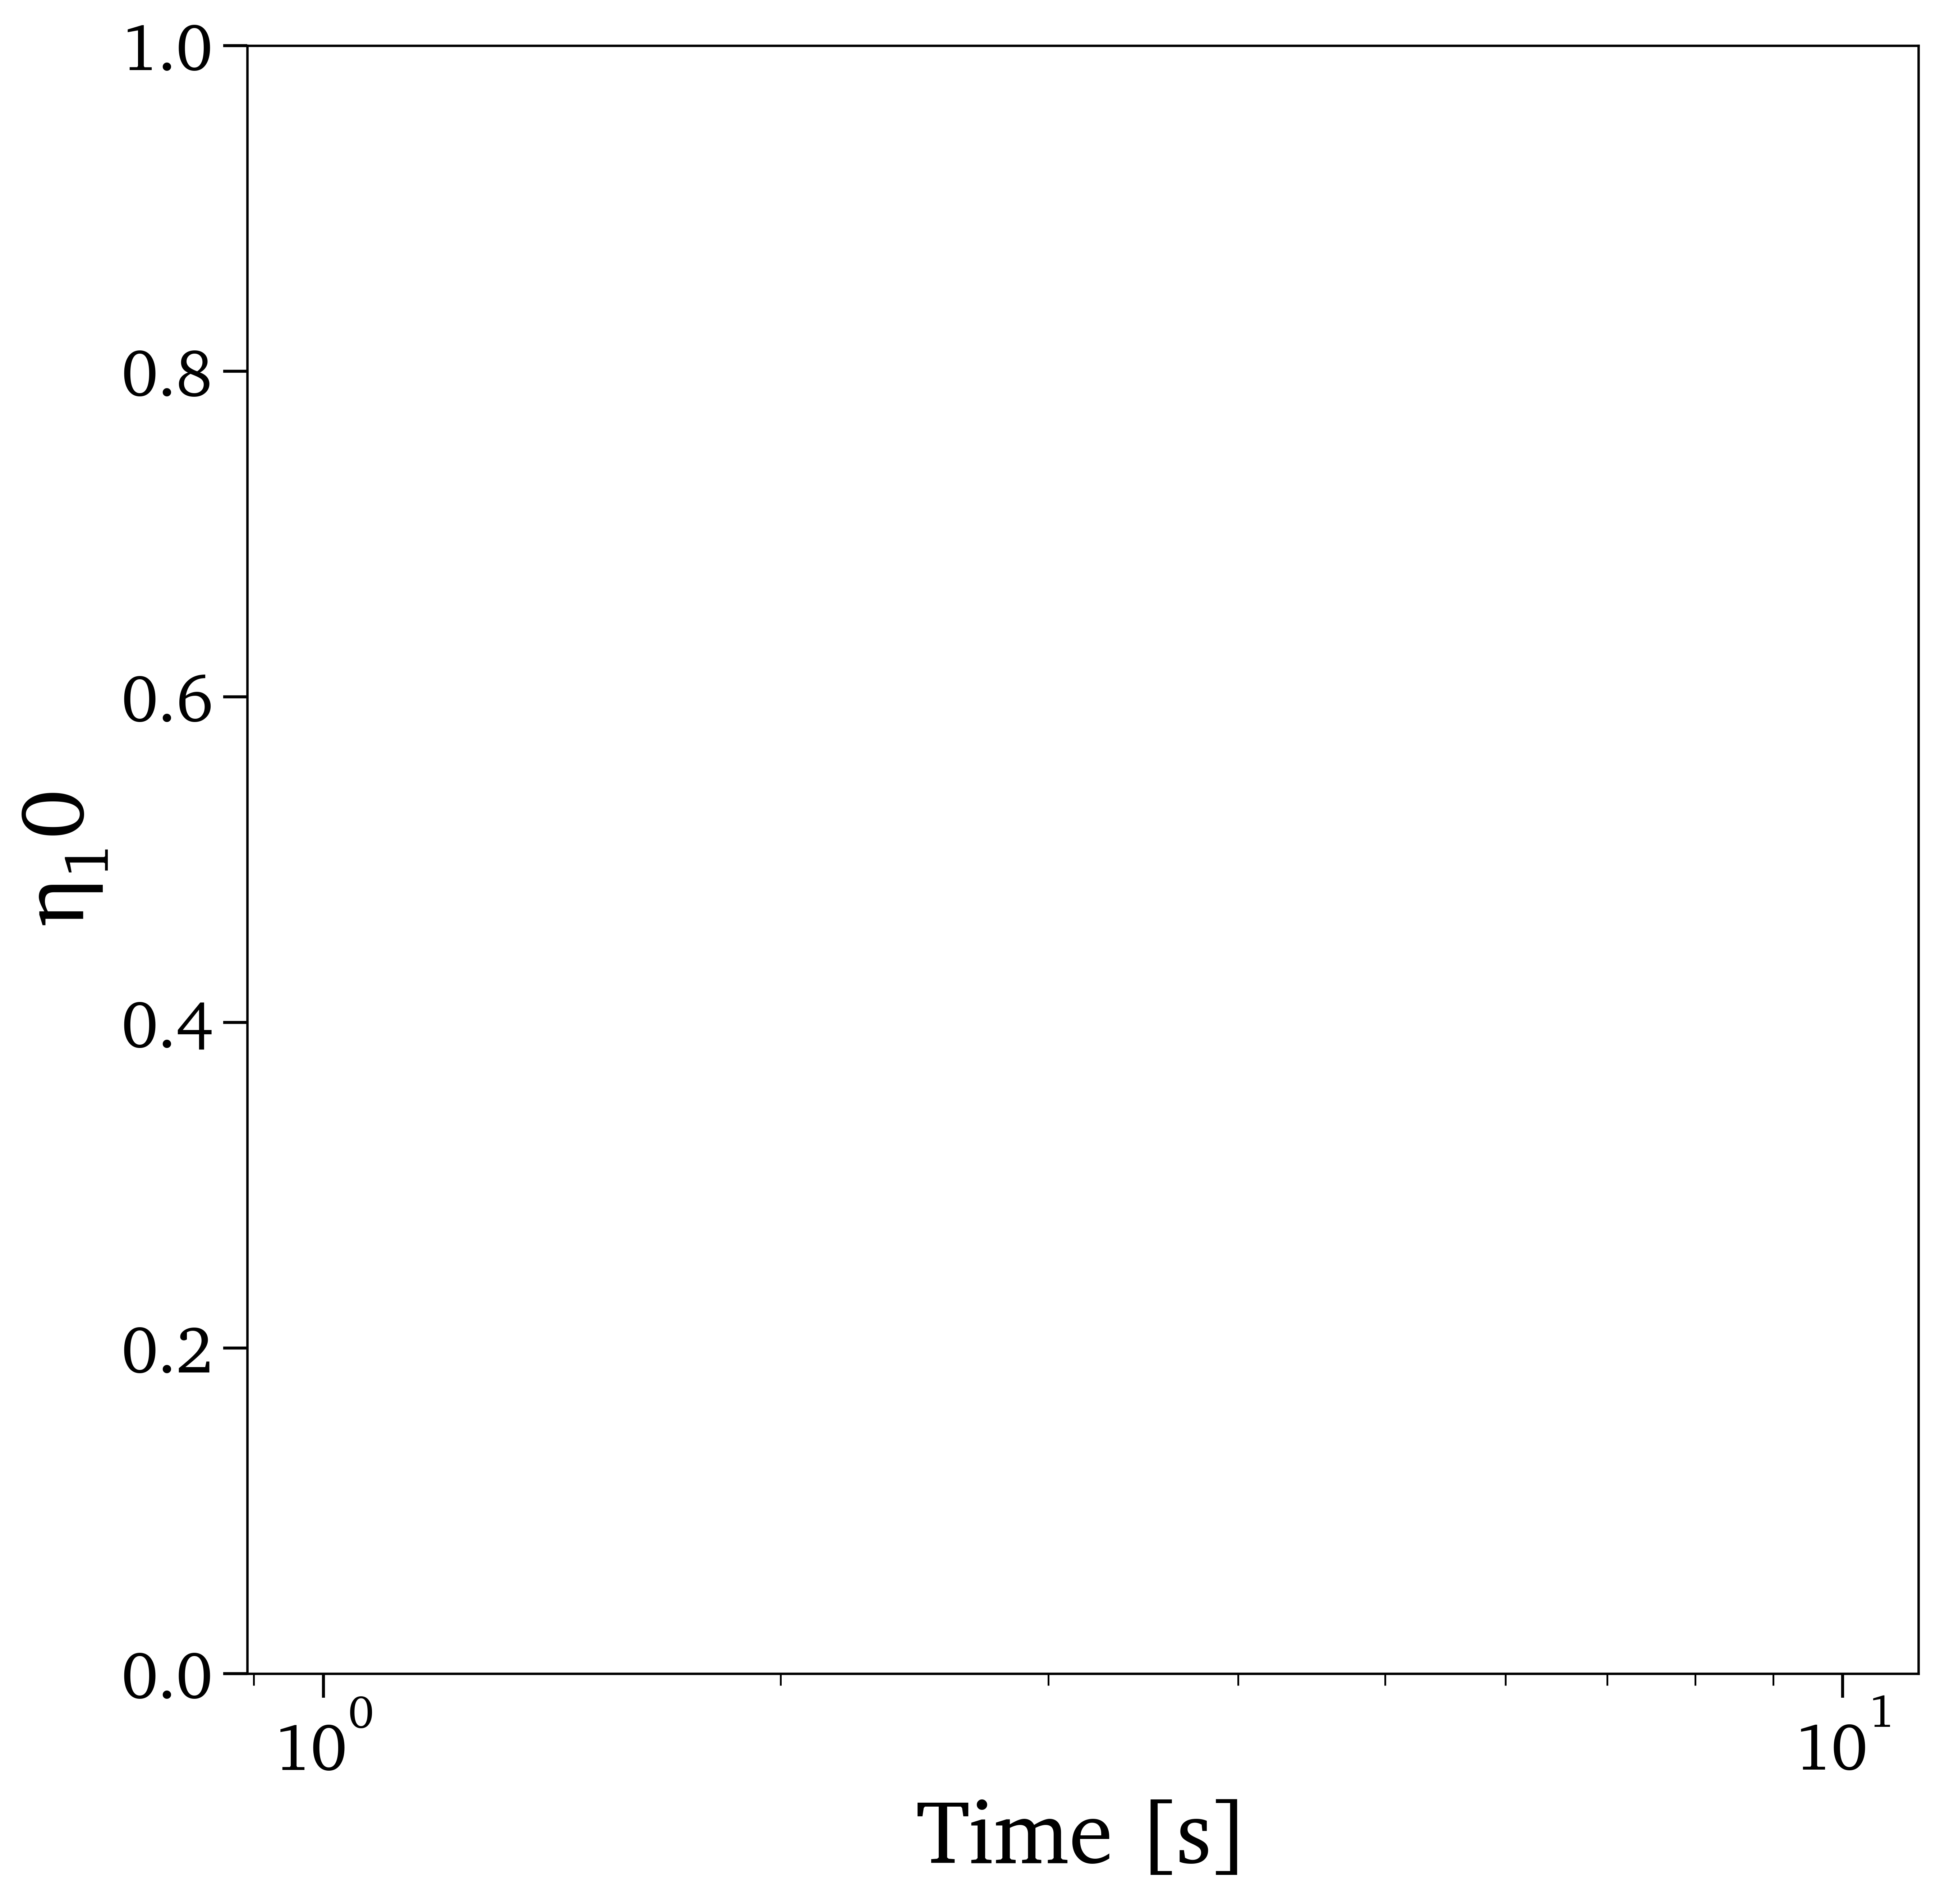

In [8]:
iPCVec = [0, 4, 9]

for iPC in iPCVec:

    fig = plt.figure()
    for iTest in CasesVec:

        try:
            FileName                     = DataDir+'/'+str(NVarsRed)+'PC/'+DataType+'/ext/PC.csv.'+str(iTest+1)
            InputDataTest                = pd.read_csv(FileName, header=0)
            tVec                         = InputDataTest['t'].to_numpy()
            #InputDataTest['log10(Rest)'] = RestVal * np.ones(len(tVec))
            yMat_pca                     = InputDataTest[InputVars].to_numpy()
            y0_pca                       = yMat_pca[0,:]
            #print('y0_pca = ', y0_pca)

            plt.plot(tVec, yMat_pca[:,iPC], '-k', label='From ODE', lw=2)

        except:
            pass

    plt.xscale('log')
    plt.xlabel('Time [s]')
    plt.ylabel(r'$\eta_'+str(iPC+1)+'$')
    #plt.legend()
    
    if (FigDir):
        plt.savefig(FigDir+'/0DReact_'+DataType+'Data_Eta'+str(iPC+1)+'.eps', format='eps', bbox_inches='tight')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/sventur/WORKSPACE/ROMNet/romnet/scripts/generating_data/0DReactor/../../../../../ROMNet/Data/0DReact_Isobaric_500Cases_H2//15PC/train/ext/PC.csv.1'

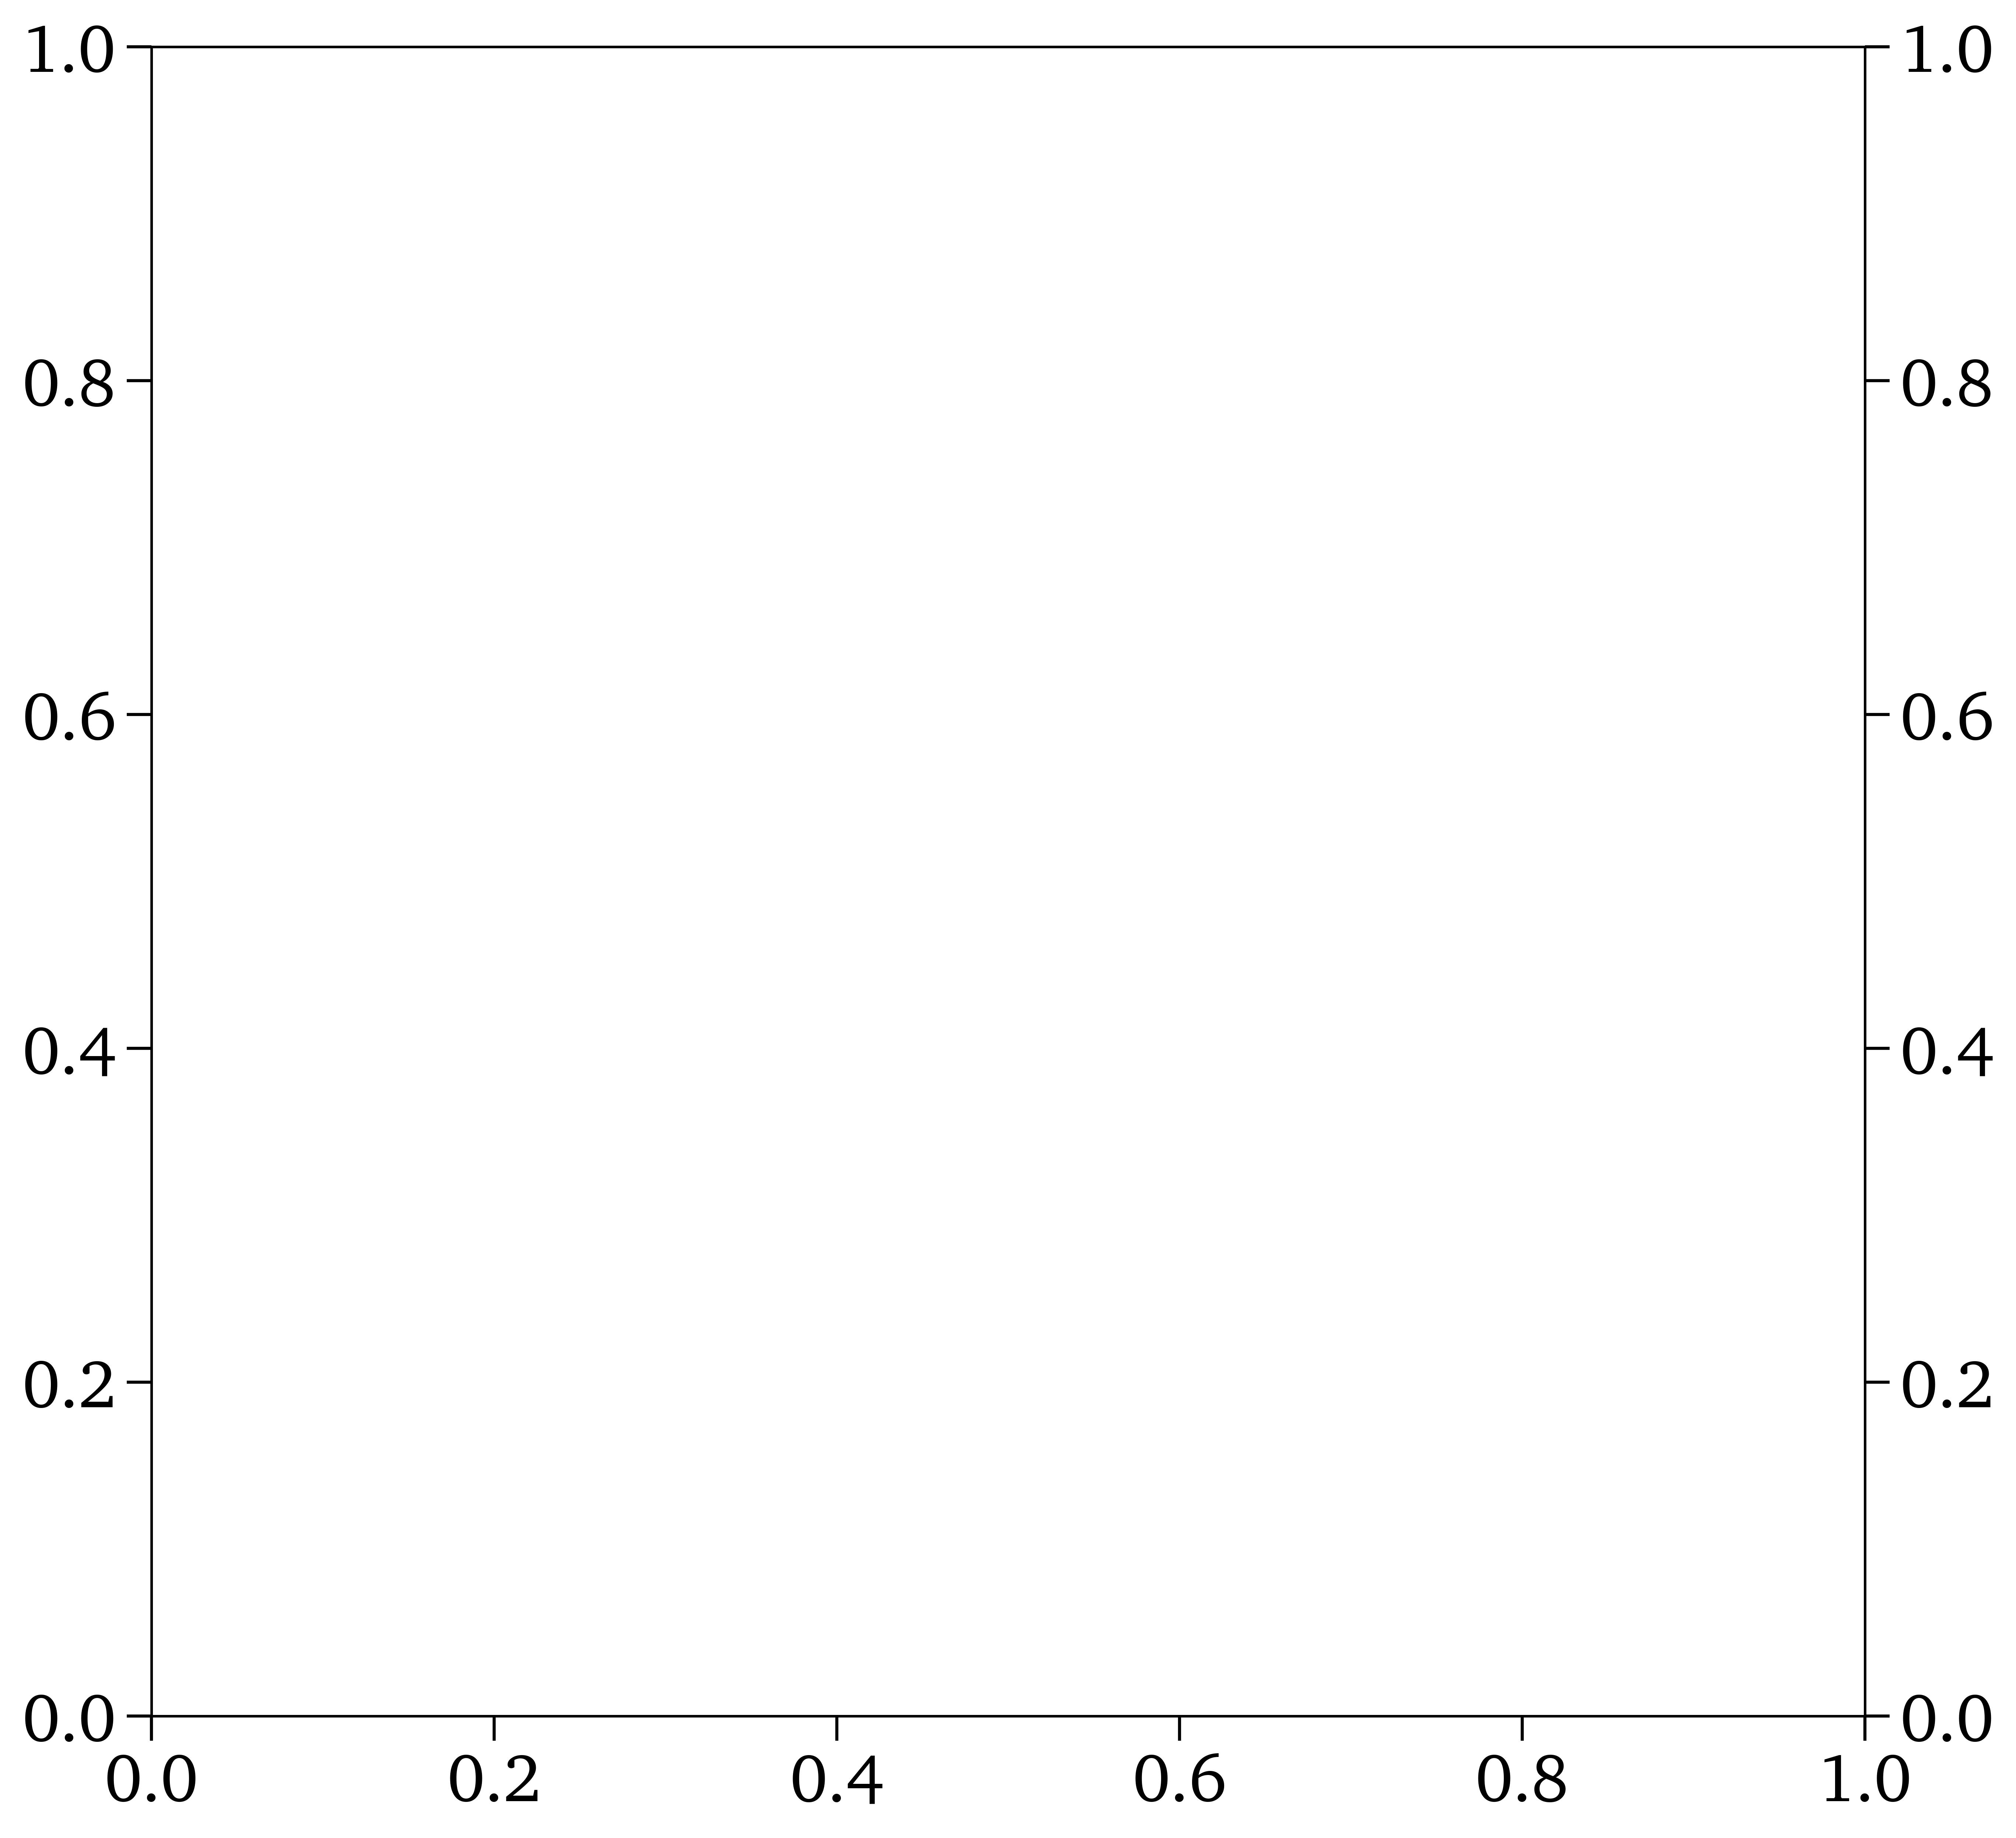

In [9]:
iPCVec   = [0, 2]

ii       = 0
fig, ax1 = plt.subplots()
ax       = [ax1]
ax.append(ax[0].twinx())  # instantiate a second axes that shares the same x-axis
for iPC in iPCVec:
    
    iVar     = VarNames.index(VarOI)

    jTest = 0
    for iTest in CasesVec:

        FileName                     = DataDir+'/'+str(NVarsRed)+'PC/'+DataType+'/ext/PC.csv.'+str(iTest+1)
        InputDataTest                = pd.read_csv(FileName, header=0)
        tVec                         = InputDataTest['t'].to_numpy()
        #InputDataTest['log10(Rest)'] = RestVal * np.ones(len(tVec))
        yMat_pca                     = InputDataTest[InputVars].to_numpy()
        y0_pca                       = yMat_pca[0,:]
        #print('y0_pca = ', y0_pca)

        color = ColorVec[ii]
        ax[ii].plot(tVec, yMat_pca[:,iPC], '-', c=color)

        # if tVec[-1] > 3.e-1:
        #     print('iTest = ', iTest)

        jTest += 1
        
    ii += 1


color = ColorVec[0]
ax[0].set_xlabel('Time [s]', size=34)
ax[0].set_ylabel('$\eta_1$', color=color, size=34)
ax[0].tick_params(axis='y', labelcolor=color)
ax[0].set_ylim([-50.,90])
ax[0].set_xscale('log')

color =  ColorVec[1]
ax[1].set_ylabel('$\eta_{2}$', color=color, size=34)  # we already handled the x-label with ax1
ax[1].tick_params(axis='y', labelcolor=color)
ax[1].set_ylim([-1.,0.4])
ax[1].set_xscale('log')


fig.tight_layout()  # otherwise the right y-label is slightly clipped


if (FigDir):
    plt.savefig(FigDir+'/0DReact_'+DataType+'Data_Eta1andEta2.eps', format='eps', bbox_inches='tight')

## Comparing Original Data vs Encoded-Decoded Data

In [ ]:
FileName = DataDir+'/'+str(NVarsRed)+'PC/ROM/A.csv'
A        = pd.read_csv(FileName, delimiter=',', header=None).to_numpy()

FileName = DataDir+'/'+str(NVarsRed)+'PC/ROM/C.csv'
C        = pd.read_csv(FileName, delimiter=',', header=None).to_numpy()

FileName = DataDir+'/'+str(NVarsRed)+'PC/ROM/D.csv'
D        = pd.read_csv(FileName, delimiter=',', header=None).to_numpy()

In [ ]:
InputVars

In [ ]:
input_vars_        = pd.read_csv(DataDir+'/'+str(NVarsRed)+'PC/CleanVars_ToRed.csv', header=None).to_numpy()[0,:]
try:
    input_vars_not = pd.read_csv(DataDir+'/'+str(NVarsRed)+'PC/CleanVars_NotToRed.csv', header=None).to_numpy()[0,:]
except:
    input_vars_not = []
input_vars         = np.append(input_vars_not, input_vars_)

In [ ]:
VarOI    = 'T'
        
fig   = plt.figure()
jTest = 0
for iTest in CasesVec:

    FileName                     = DataDir+'/'+str(NVarsRed)+'PC/'+DataType+'/ext/PC.csv.'+str(iTest+1)
    InputDataTest                = pd.read_csv(FileName, header=0)
    tVec                         = InputDataTest['t'].to_numpy()
    #InputDataTest['log10(Rest)'] = RestVal * np.ones(len(tVec))
    yMat_pca                     = InputDataTest[InputVars].to_numpy()
    yMat_                        = pd.DataFrame( (yMat_pca.dot(A))*D[:,0] + C[:,0], columns=input_vars_)        
    if (scale == 'log10'):
        yMat_                    = 10**yMat_
    
    
    FileName     = DataDir +'/Orig/'+DataType+'/ext/y.csv.'+str(iTest+1)
    Data         = pd.read_csv(FileName, header=0)
        
    if (jTest == 0):
        Label1 = 'ODE'
        Label2 = 'PCA, $N_{\eta}='+str(NVarsRed)+'$'
    else:
        Label1 = ''
        Label2 = ''
    plt.plot(Data['t'], Data[VarOI], '-',  c=ColorVec[0], label=Label1)
    plt.plot(Data['t'], yMat_[VarOI],    '--', c=ColorVec[3], label=Label2)
    
#     if tVec[-1] > 3.e-1:
#         print('iTest = ', iTest)
        
    jTest += 1

plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Time [s]')
plt.ylabel('Temperature [K]')
plt.legend()

if (FigDir):
    plt.savefig(FigDir+'/0DReact_'+DataType+'Data_T_Reconstructed.eps', format='eps', bbox_inches='tight')

In [ ]:
VarOIVec = ['T', 'H2', 'H', 'O', 'O2', 'OH', 'H2O', 'HO2', 'H2O2', 'N', 'NH', 'NH2', 'NH3', 'NNH', 'NO', 'NO2', 'N2O', 'HNO', 'N2']

for VarOI in VarOIVec:
    
    iVar     = VarNames.index(VarOI)

    fig   = plt.figure()
    jTest = 0
    for iTest in CasesVec:

        FileName                     = DataDir+'/'+str(NVarsRed)+'PC/'+DataType+'/ext/PC.csv.'+str(iTest+1)
        InputDataTest                = pd.read_csv(FileName, header=0)
        tVec                         = InputDataTest['t'].to_numpy()
        #InputDataTest['log10(Rest)'] = RestVal * np.ones(len(tVec))
        yMat_pca                     = InputDataTest[InputVars].to_numpy()
        yMat_                        = (yMat_pca.dot(A))*D[:,0] + C[:,0]
        if (scale == 'log10'):
            yMat_                    = 10**yMat_

        FileName     = DataDir +'/Orig/'+DataType+'/ext/y.csv.'+str(iTest+1)
        Data         = pd.read_csv(FileName, header=0)
        tVec         = Data.to_numpy()[:,0]
        yMat         = Data.to_numpy()[:,1:]
        VarOrig      = list(Data.columns)
        iVarOrig     = VarOrig.index(VarOI)-1

        if (jTest == 0):
            Label1 = 'ODE'
            Label2 = 'PCA, $N_{\eta}='+str(NVarsRed)+'$'
        else:
            Label1 = ''
            Label2 = ''
        plt.plot(tVec, yMat[:,iVarOrig], '-',  c=ColorVec[0], label=Label1)
        plt.plot(tVec, yMat_[:,iVar],    '--', c=ColorVec[3], label=Label2)

        # if tVec[-1] > 3.e-1:
        #     print('iTest = ', iTest)

        jTest += 1

    plt.xscale('log')
    #plt.yscale('log')
    plt.xlabel('Time [s]')
    plt.ylabel(VarOI+', Mass Fraction')
    plt.legend()

    if (FigDir):
        plt.savefig(FigDir+'/0DReact_'+DataType+'Data_'+VarOI+'_Reconstructed.eps', format='eps', bbox_inches='tight')

In [ ]:
VarOIVec = ['T', 'H2', 'H', 'O', 'O2', 'OH', 'H2O', 'HO2', 'H2O2', 'N', 'NH', 'NH2', 'NH3', 'NNH', 'NO', 'NO2', 'N2O', 'HNO', 'N2']

for VarOI in VarOIVec:
    
    iVar     = VarNames.index(VarOI)

    fig   = plt.figure()
    jTest = 0
    for iTest in CasesVec:

        FileName                     = DataDir+'/'+str(NVarsRed)+'PC/'+DataType+'/ext/PC.csv.'+str(iTest+1)
        InputDataTest                = pd.read_csv(FileName, header=0)
        tVec                         = InputDataTest['t'].to_numpy()
        #InputDataTest['log10(Rest)'] = RestVal * np.ones(len(tVec))
        yMat_pca                     = InputDataTest[InputVars].to_numpy()
        yMat_                        = (yMat_pca.dot(A))*D[:,0] + C[:,0]
        if (scale == 'log10'):
            yMat_                    = 10**yMat_

        FileName     = DataDir +'/Orig/'+DataType+'/ext/y.csv.'+str(iTest+1)
        Data         = pd.read_csv(FileName, header=0)
        tVec         = Data.to_numpy()[:,0]
        yMat         = Data.to_numpy()[:,1:]
        VarOrig      = list(Data.columns)
        iVarOrig     = VarOrig.index(VarOI)-1

        if (jTest == 0):
            Label1 = 'ODE'
            Label2 = 'PCA, $N_{\eta}='+str(NVarsRed)+'$'
        else:
            Label1 = ''
            Label2 = ''
        plt.plot(tVec, yMat[:,iVarOrig], '-',  c=ColorVec[0], label=Label1)
        plt.plot(tVec, yMat_[:,iVar],    '--', c=ColorVec[3], label=Label2)

        # if tVec[-1] > 3.e-1:
        #     print('iTest = ', iTest)

        jTest += 1

    plt.xscale('log')
    #plt.yscale('log')
    plt.xlabel('Time [s]')
    plt.ylabel(VarOI+', Mass Fraction')
    plt.legend()

    if (FigDir):
        plt.savefig(FigDir+'/0DReact_'+DataType+'Data_'+VarOI+'_Reconstructed.eps', format='eps', bbox_inches='tight')

In [ ]:
VarOIVec  = ['T', 'H2']
ColorVecB = ['#848484', '#DF7401'] 

ii       = 0
fig, ax1 = plt.subplots()
ax       = [ax1]
ax.append(ax[0].twinx())  # instantiate a second axes that shares the same x-axis
for VarOI in VarOIVec:
    
    iVar     = VarNames.index(VarOI)

    jTest = 0
    for iTest in CasesVec:

        FileName                     = DataDir+'/'+str(NVarsRed)+'PC/'+DataType+'/ext/PC.csv.'+str(iTest+1)
        InputDataTest                = pd.read_csv(FileName, header=0)
        tVec                         = InputDataTest['t'].to_numpy()
        #InputDataTest['log10(Rest)'] = RestVal * np.ones(len(tVec))
        yMat_pca                     = InputDataTest[InputVars].to_numpy()
        yMat_                        = (yMat_pca.dot(A))*D[:,0] + C[:,0]
        if (scale == 'log10'):
            yMat_                    = 10**yMat_

        FileName     = DataDir +'/Orig/'+DataType+'/ext/y.csv.'+str(iTest+1)
        Data         = pd.read_csv(FileName, header=0)
        tVec         = Data.to_numpy()[:,0]
        yMat         = Data.to_numpy()[:,1:]
        VarOrig      = list(Data.columns)
        iVarOrig     = VarOrig.index(VarOI)-1

        if (jTest == 0):
            Label1 = 'ODE'
            Label2 = 'PCA, $N_{\eta}='+str(NVarsRed)+'$'
        else:
            Label1 = ''
            Label2 = ''

        color = ColorVec[ii]
        ax[ii].plot(tVec, yMat[:,iVarOrig], '-', c=color, label=Label1)

        color = ColorVecB[ii]
        ax[ii].plot(tVec, yMat_[:,iVar], ':', c=color, label=Label2)

        # if tVec[-1] > 3.e-1:
        #     print('iTest = ', iTest)

        jTest += 1
        
    ii += 1


color = ColorVec[0]
ax[0].set_xlabel('Time [s]', size=34)
ax[0].set_ylabel('Temperature [K]', color=color, size=34)
ax[0].tick_params(axis='y', labelcolor=color)
#ax[0].set_ylim([-6.,6.])
ax[0].set_xscale('log')

color =  ColorVec[1]
ax[1].set_ylabel('H${}_2$, Mass Fraction', color=color, size=34)  # we already handled the x-label with ax1
ax[1].tick_params(axis='y', labelcolor=color)
#ax[1].set_ylim([-6.,6.])
ax[1].set_xscale('log')

plt.legend(loc=4)

fig.tight_layout()  # otherwise the right y-label is slightly clipped


if (FigDir):
    plt.savefig(FigDir+'/0DReact_'+DataType+'Data_Tand'+VarOI+'_Reconstructed.eps', format='eps', bbox_inches='tight')

In [ ]:
VarOIVec = ['T', 'H2', 'H', 'O', 'O2', 'OH', 'H2O', 'HO2', 'H2O2', 'N', 'NH', 'NH2', 'NH3', 'NNH', 'NO', 'NO2', 'N2O', 'HNO', 'N2']

for VarOI in VarOIVec:
    
    iVar     = VarNames.index(VarOI)

    fig   = plt.figure()
    jTest = 0
    for iTest in CasesVec:

        FileName                     = DataDir+'/'+str(NVarsRed)+'PC/'+DataType+'/ext/PC.csv.'+str(iTest+1)
        InputDataTest                = pd.read_csv(FileName, header=0)
        tVec                         = InputDataTest['t'].to_numpy()
        #InputDataTest['log10(Rest)'] = RestVal * np.ones(len(tVec))
        yMat_pca                     = InputDataTest[InputVars].to_numpy()
        yMat_                        = (yMat_pca.dot(A))*D[:,0] + C[:,0]
        if (scale == 'log10'):
            yMat_                    = 10**yMat_

        FileName     = DataDir +'/Orig/'+DataType+'/ext/y.csv.'+str(iTest+1)
        Data         = pd.read_csv(FileName, header=0)
        tVec         = Data.to_numpy()[:,0]
        yMat         = Data.to_numpy()[:,1:]
        VarOrig      = list(Data.columns)
        iVarOrig     = VarOrig.index(VarOI)-1

        if (jTest == 0):
            Label1 = 'ODE'
            Label2 = 'PCA, $N_{\eta}='+str(NVarsRed)+'$'
        else:
            Label1 = ''
            Label2 = ''
        plt.plot(tVec, yMat[:,iVarOrig], '-',  c=ColorVec[0], label=Label1)
        plt.plot(tVec, yMat_[:,iVar],    '--', c=ColorVec[3], label=Label2)

#         if tVec[-1] > 3.e-1:
#             print('iTest = ', iTest)

        jTest += 1

    plt.xscale('log')
    #plt.yscale('log')
    plt.xlabel('Time [s]')
    plt.ylabel(VarOI+', Mass Fraction')
    plt.legend()

    if (FigDir):
        plt.savefig(FigDir+'/0DReact_'+DataType+'Data_'+VarOI+'_Reconstructed.eps', format='eps', bbox_inches='tight')